# Develop composition analyses.

Here we guide the development of composition analyses.
The code is developed as a class. Here we document and test the development.

In [1]:
import os
import numpy as np
import pandas as pd
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")

In [2]:
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                location=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


In [ ]:
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity
from neuro_dmt.models.bluebrain.circuit.mock.circuit\
    import MockBlueBrainCircuitModel
#mock_circuit_model = MockBlueBrainCircuitModel(
#    circuit_composition,
#    circuit_connectivity)

In [ ]:
cell_count =\
    adapter.get_cells(
        circuit_bio_m, layer="L2", region="S1HL"
).shape[0]
spatial_volume =\
    adapter.get_spatial_volume(
        circuit_bio_m, layer="L2", region="S1HL"
)
cell_count / spatial_volume

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>                                                      
Analyzing circuit BlueBrainCircuitModel

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>                                                      
1. Analyze Cell Density.

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>                                                      
	POST cell density report

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>         

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>                                                      
	POST mtype cell density by layer report

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>                                                      
Mtype cell density by layer analysis report generated at /Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/notebooks/analyses/mtype_cell_density/20191212/164118

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-12 16:36:37>                                                      
DONE


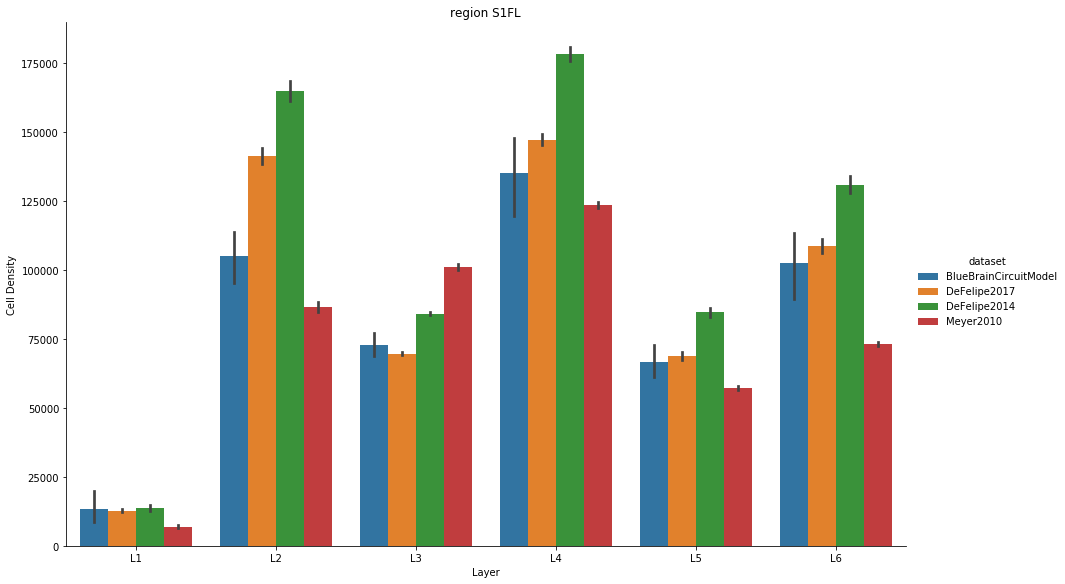

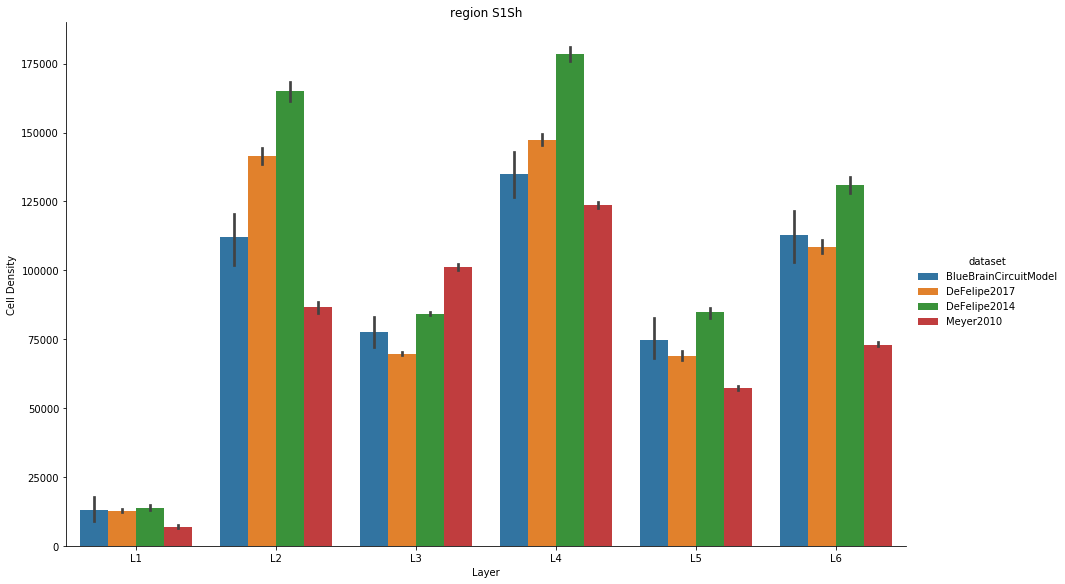

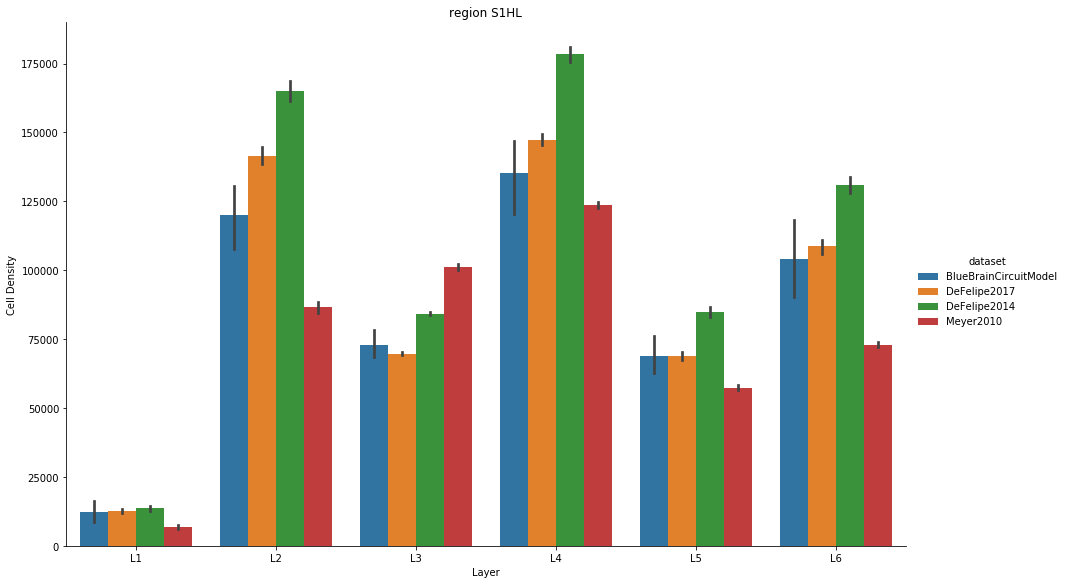

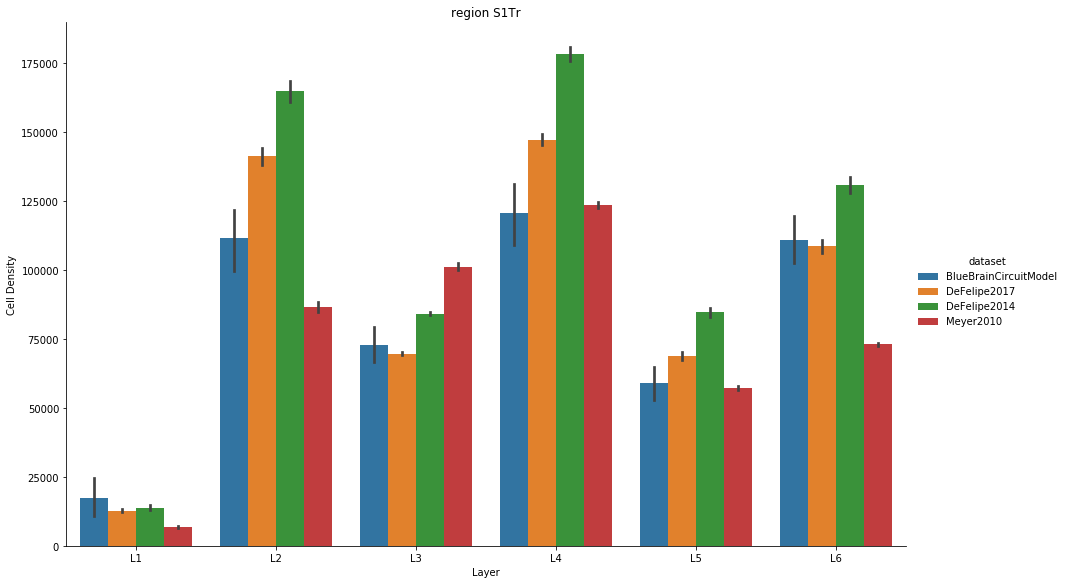

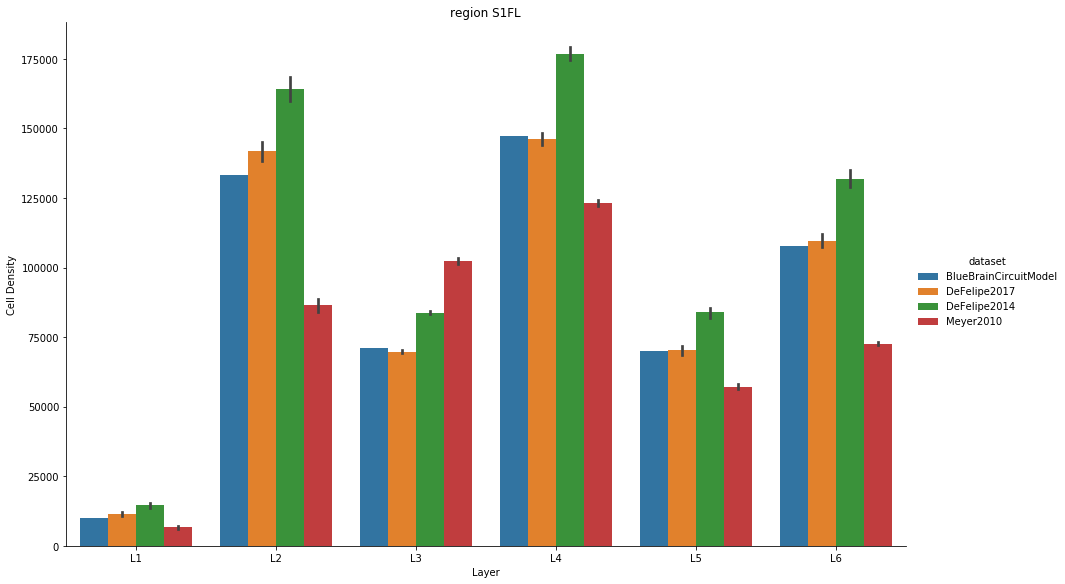

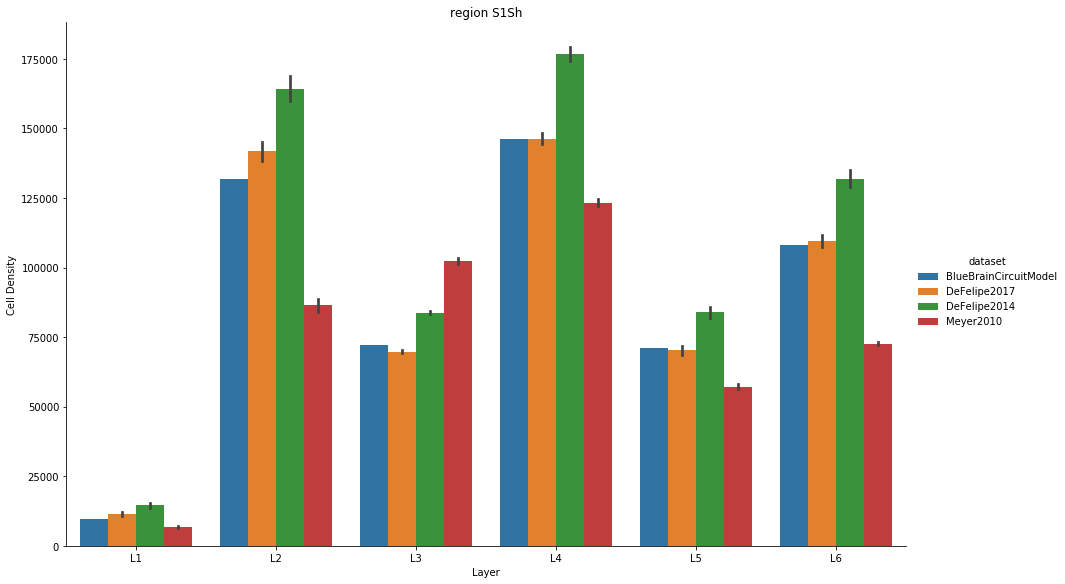

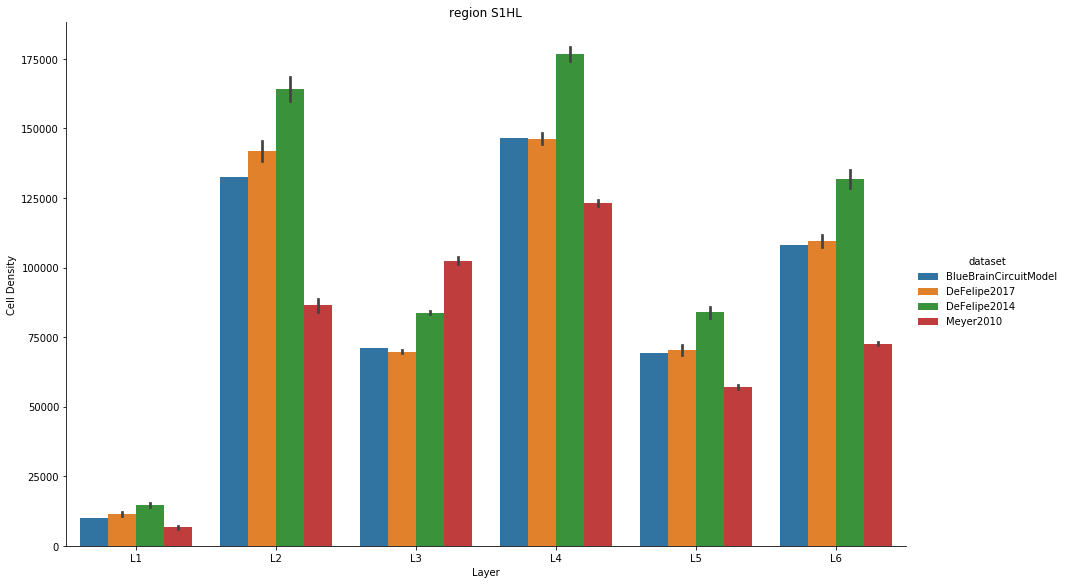

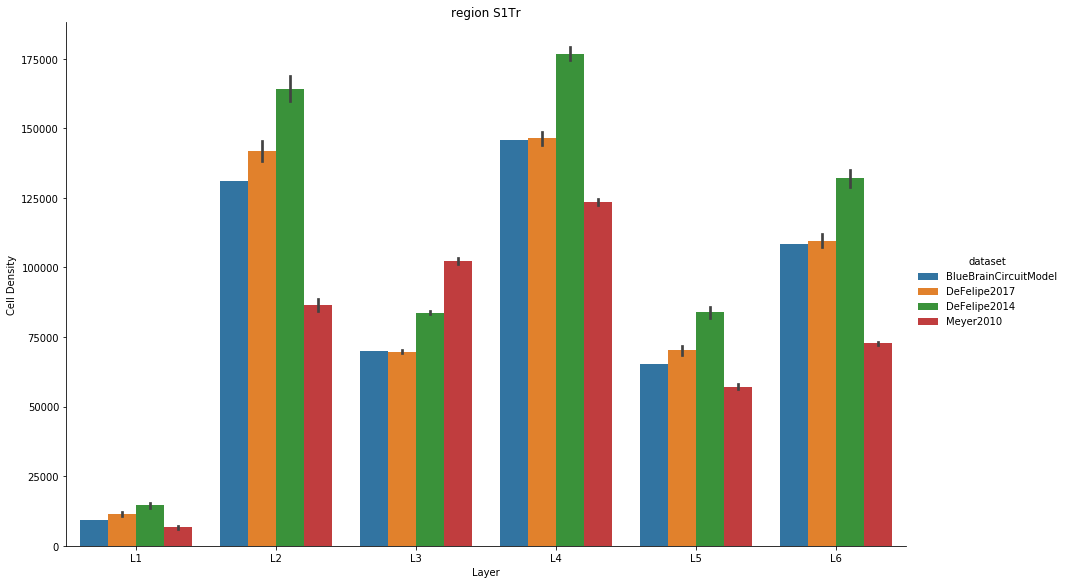

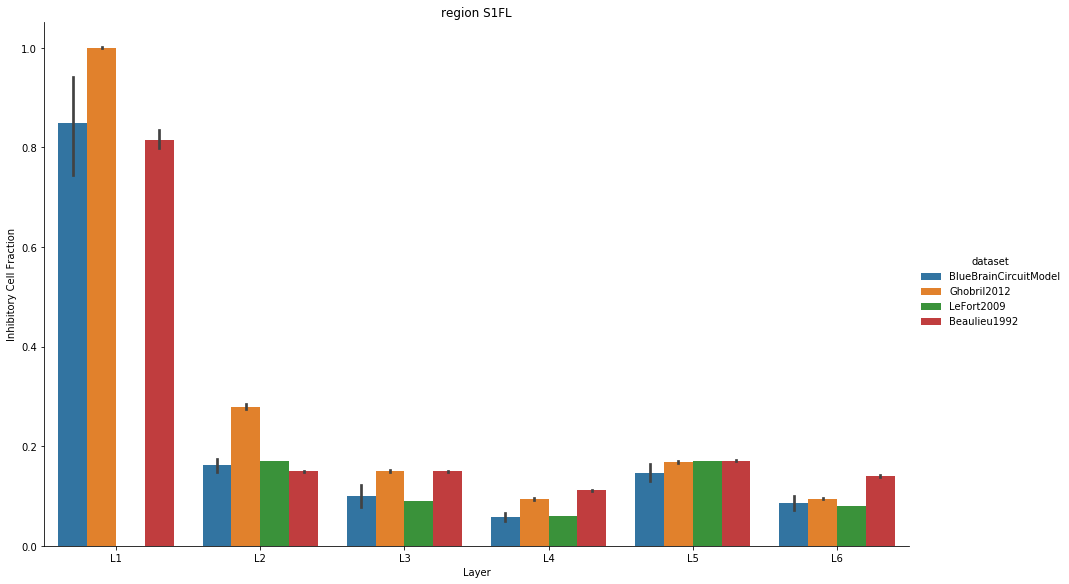

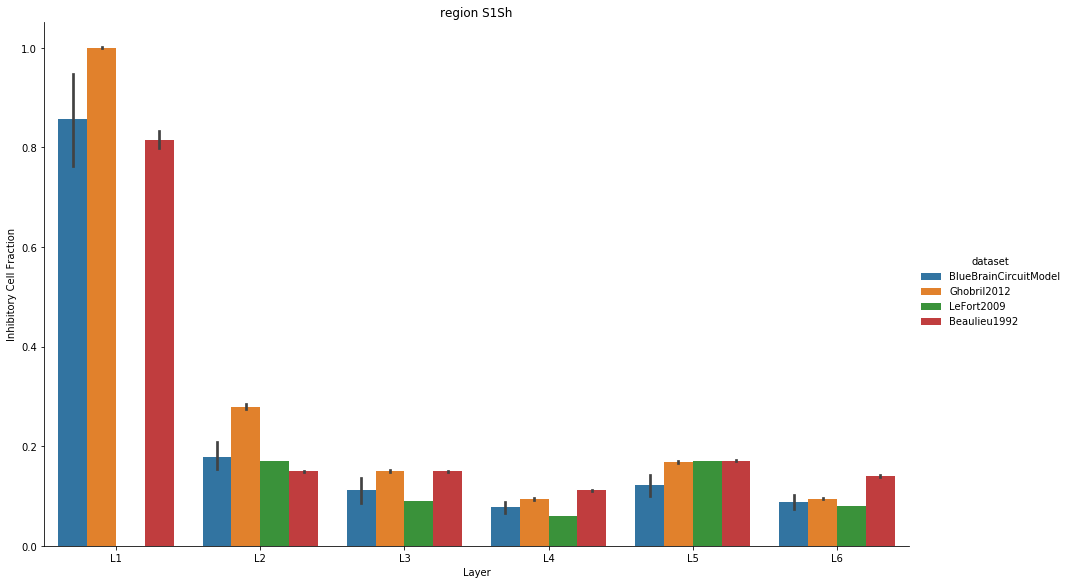

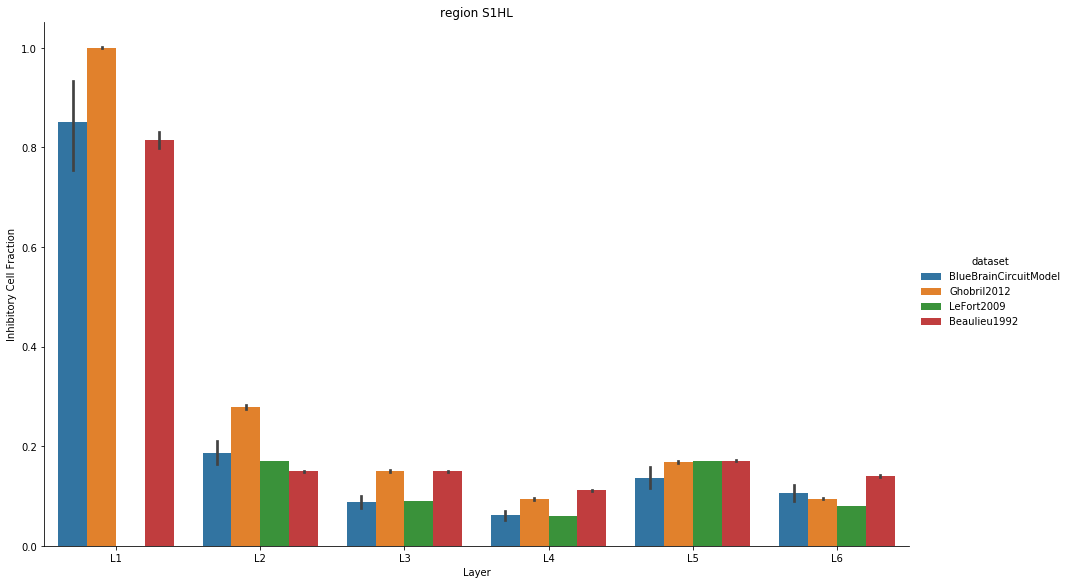

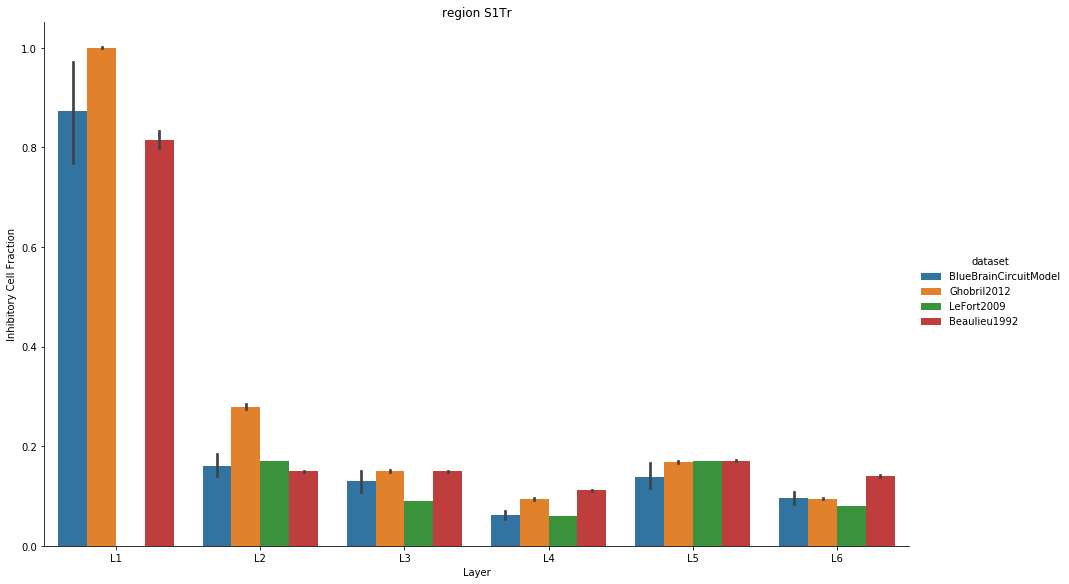

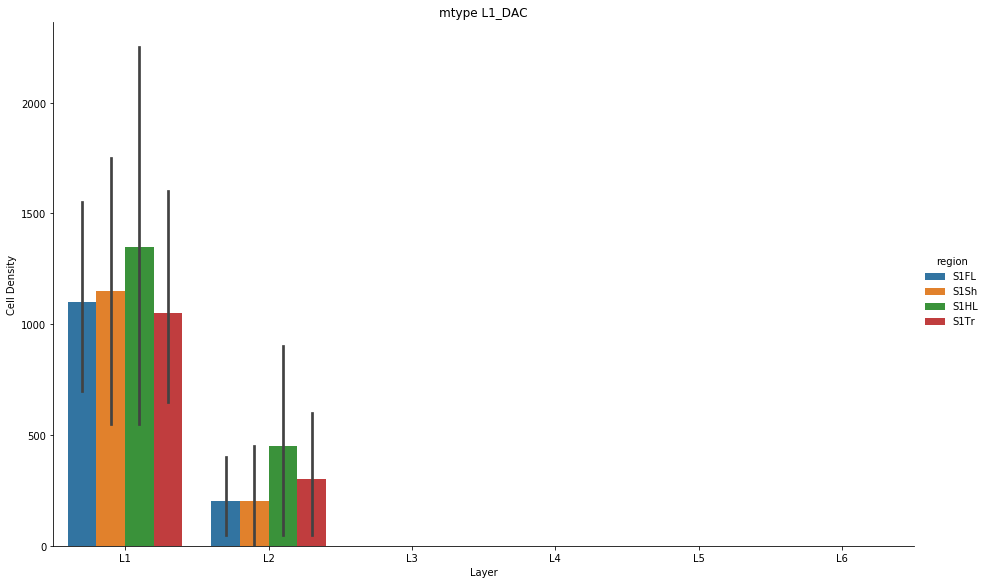

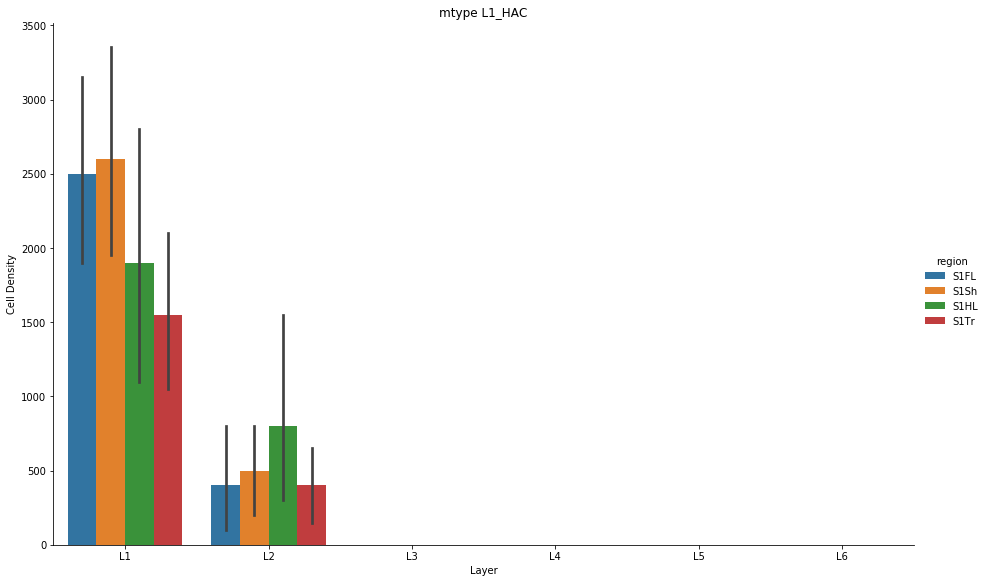

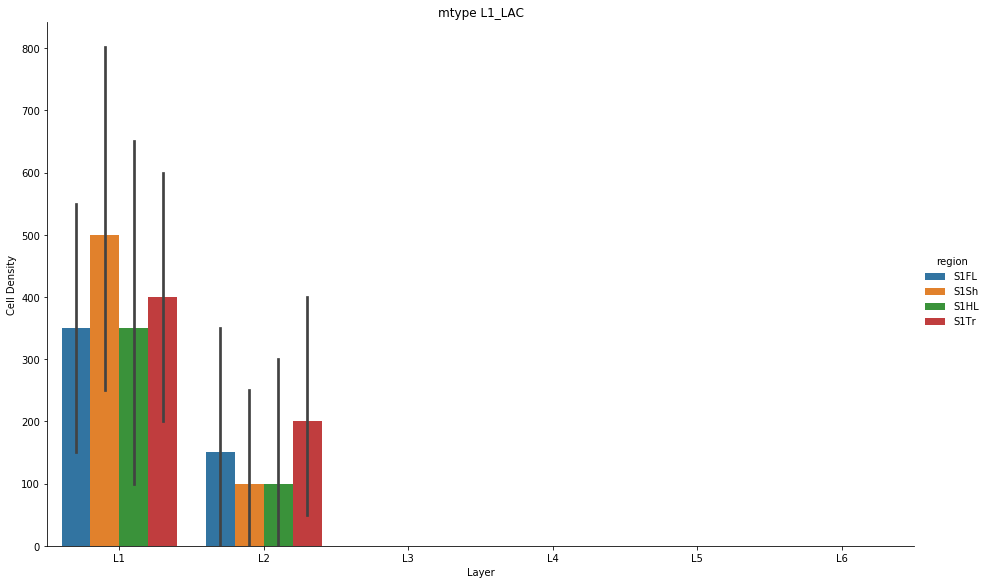

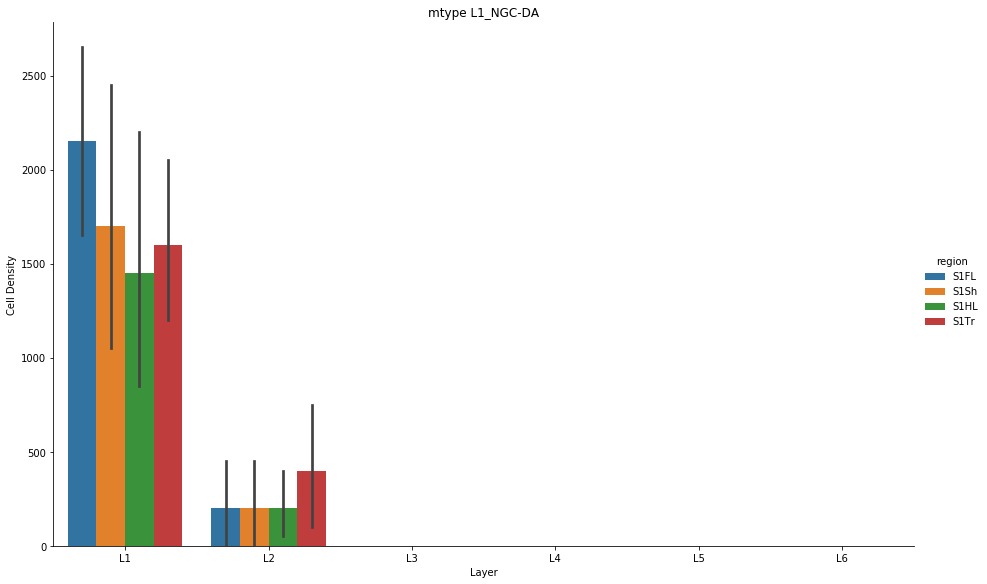

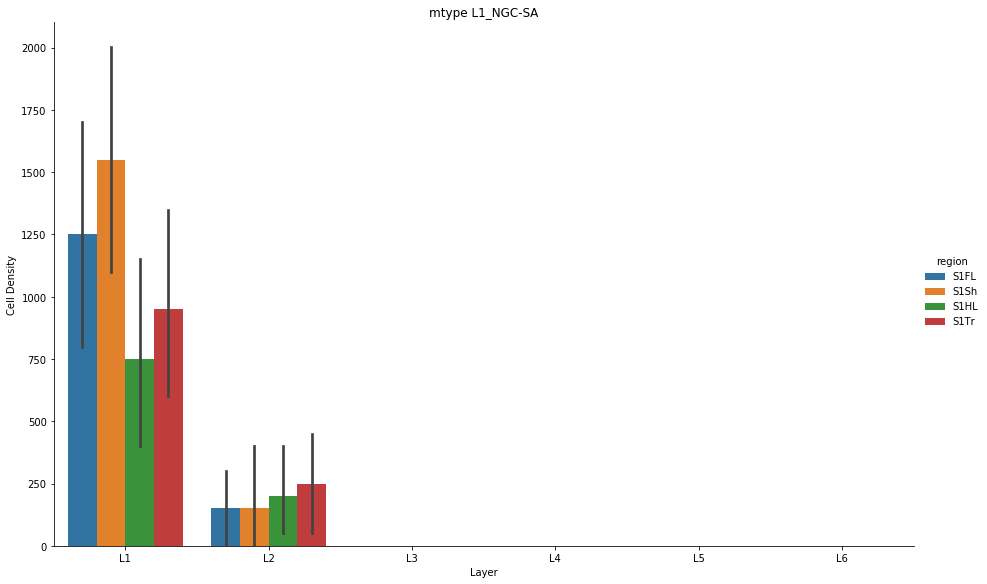

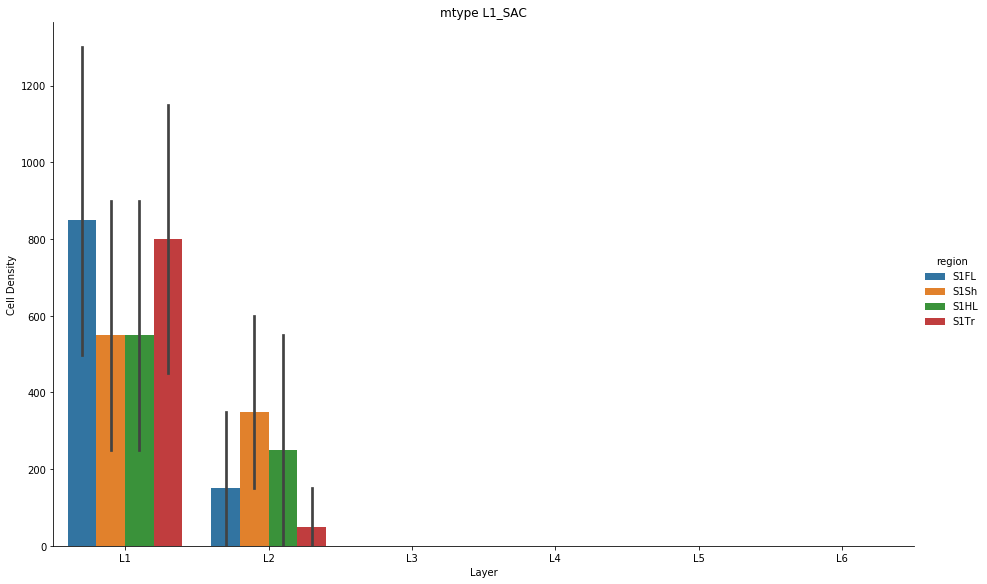

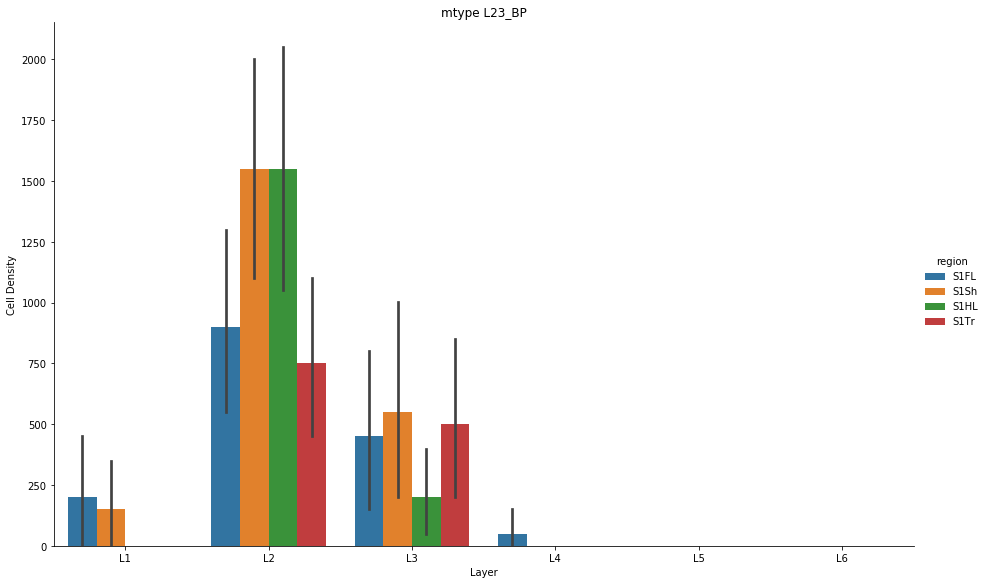

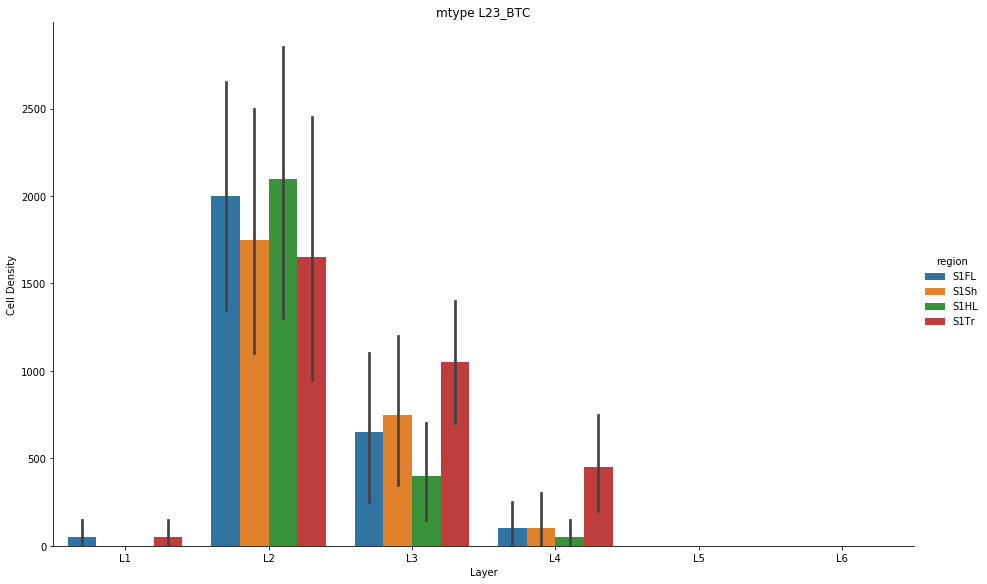

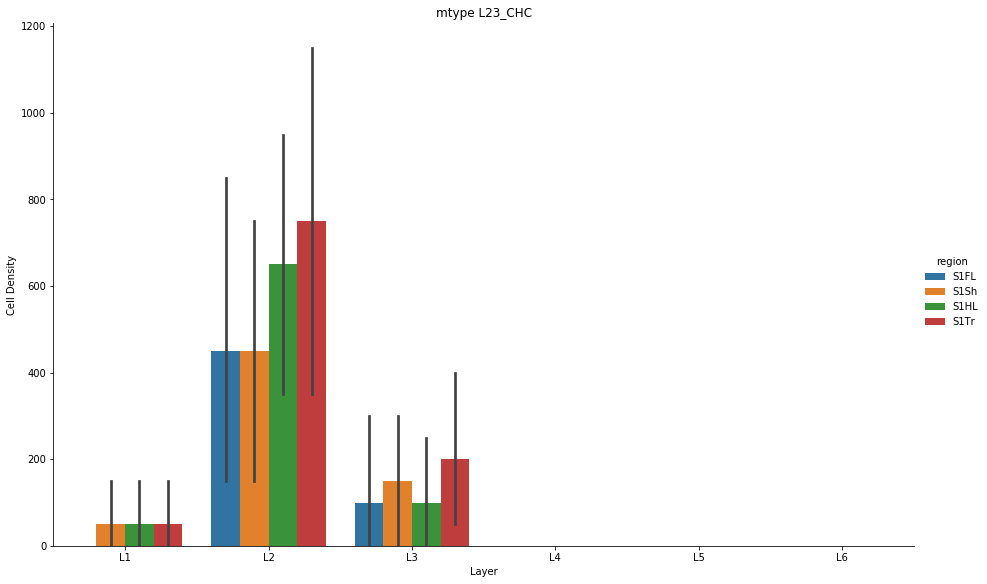

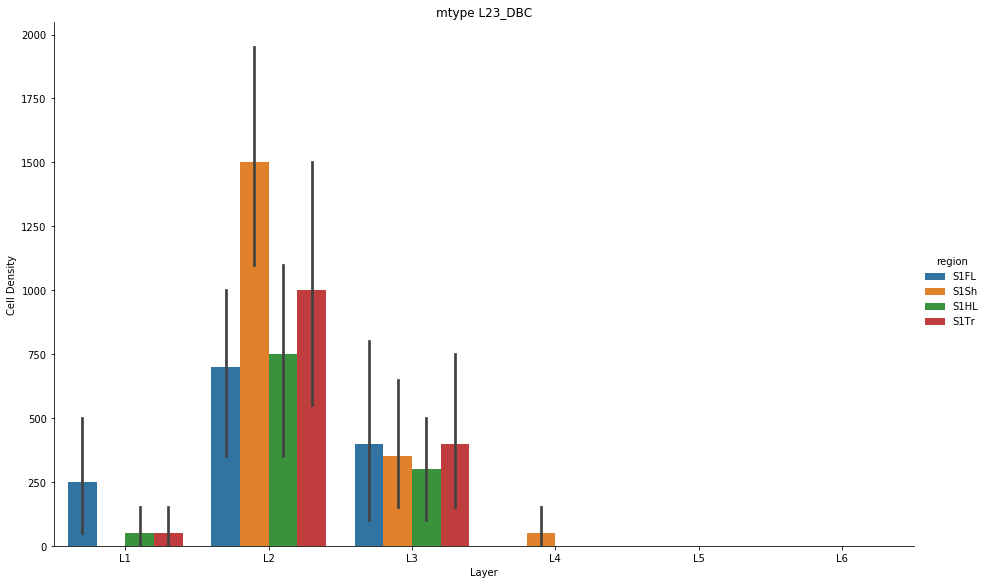

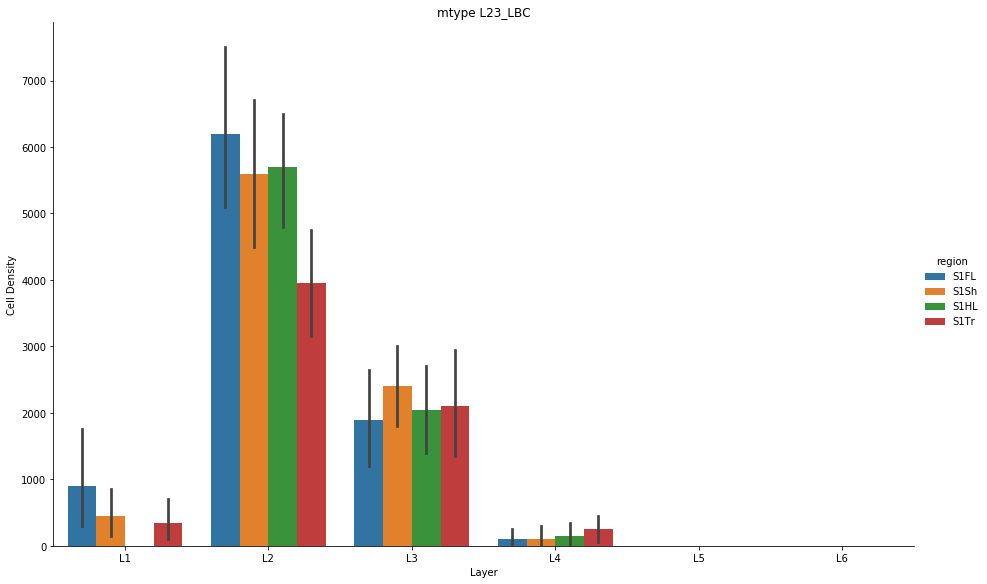

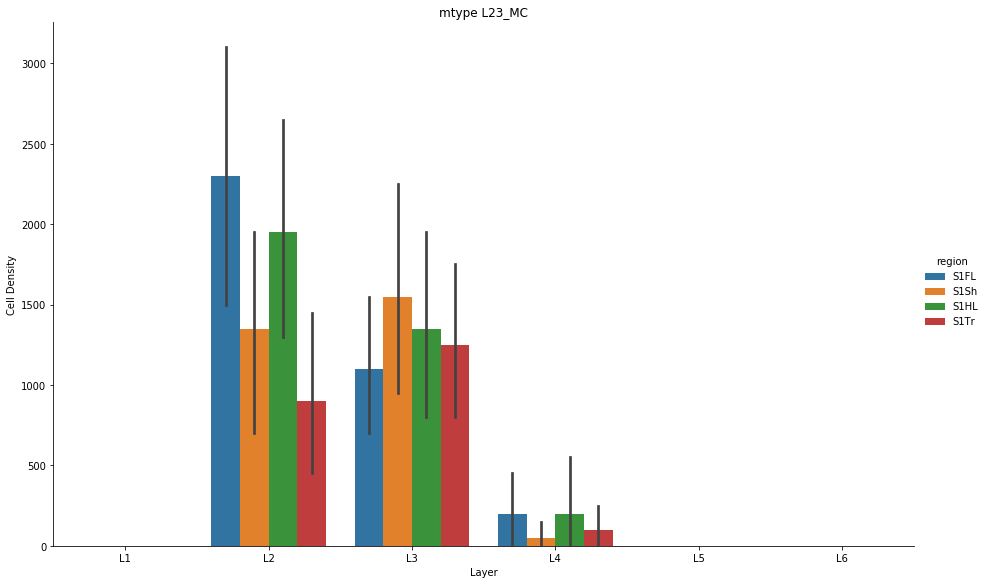

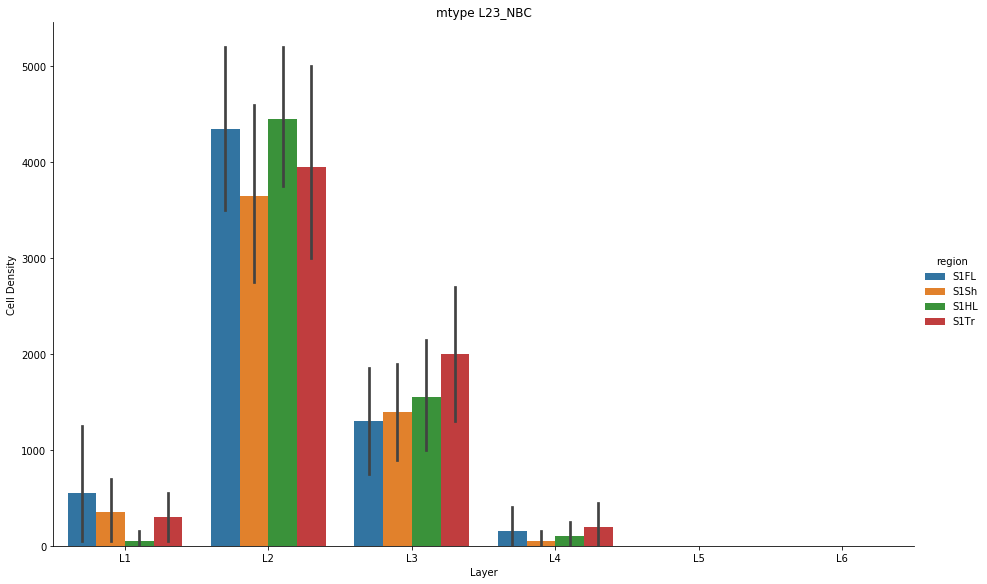

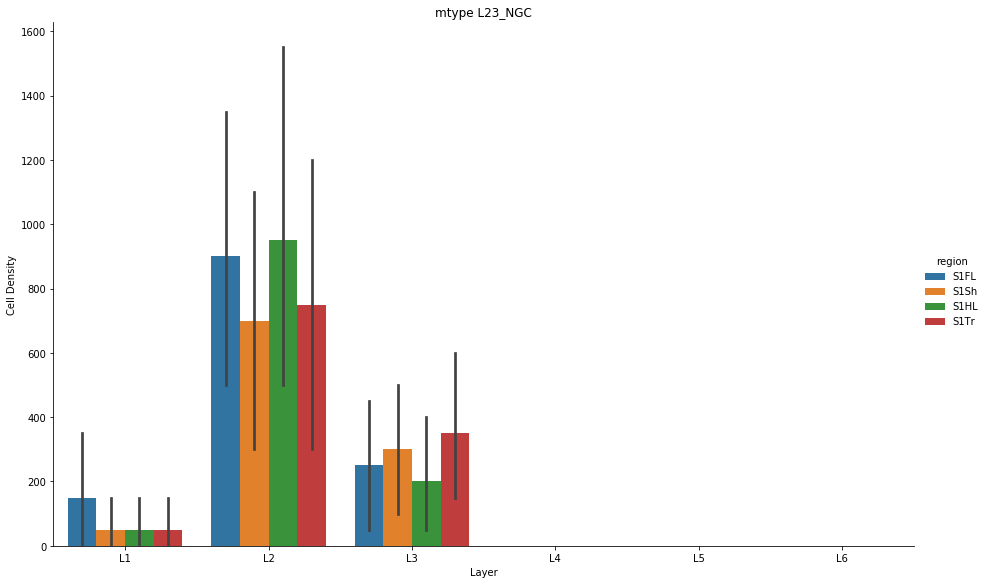

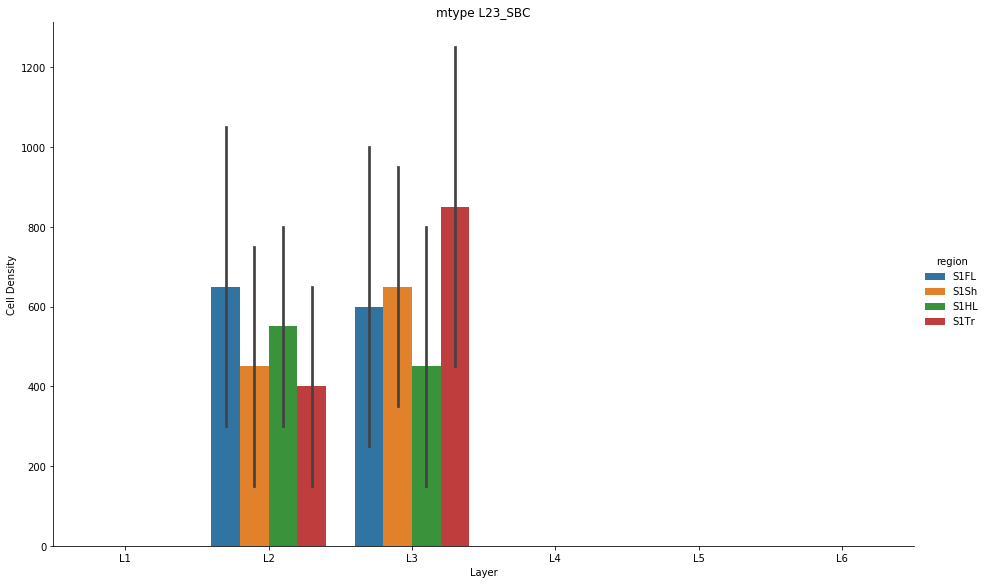

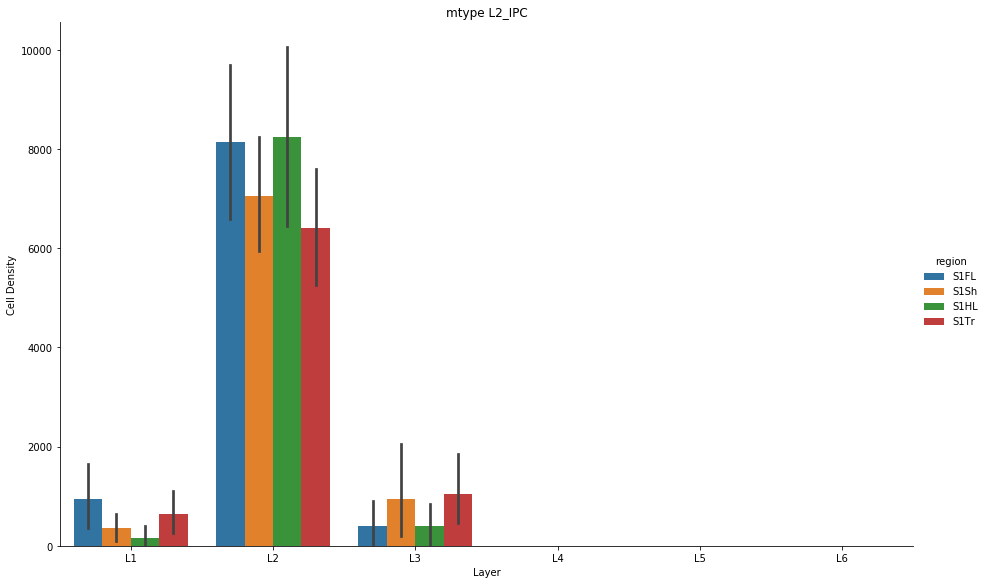

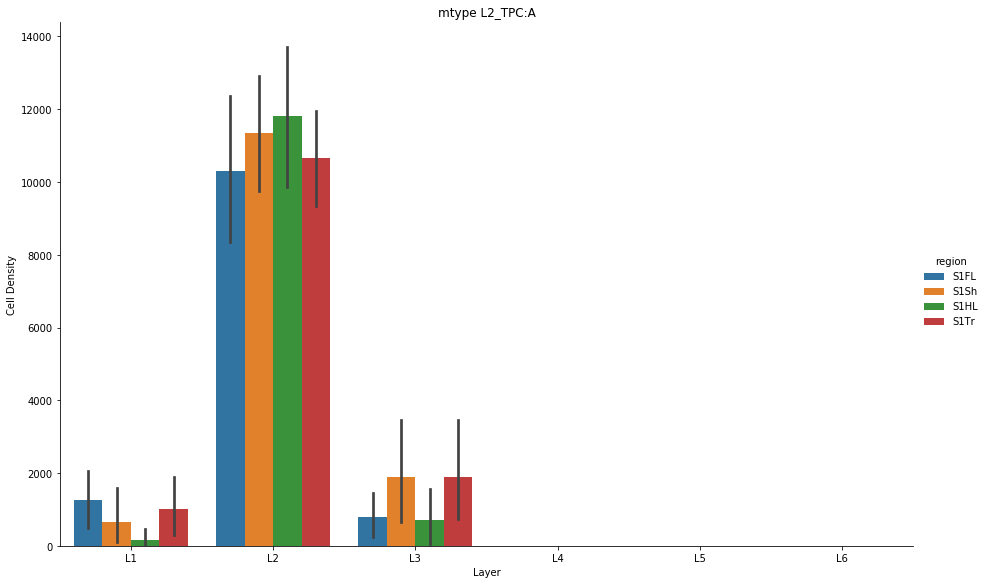

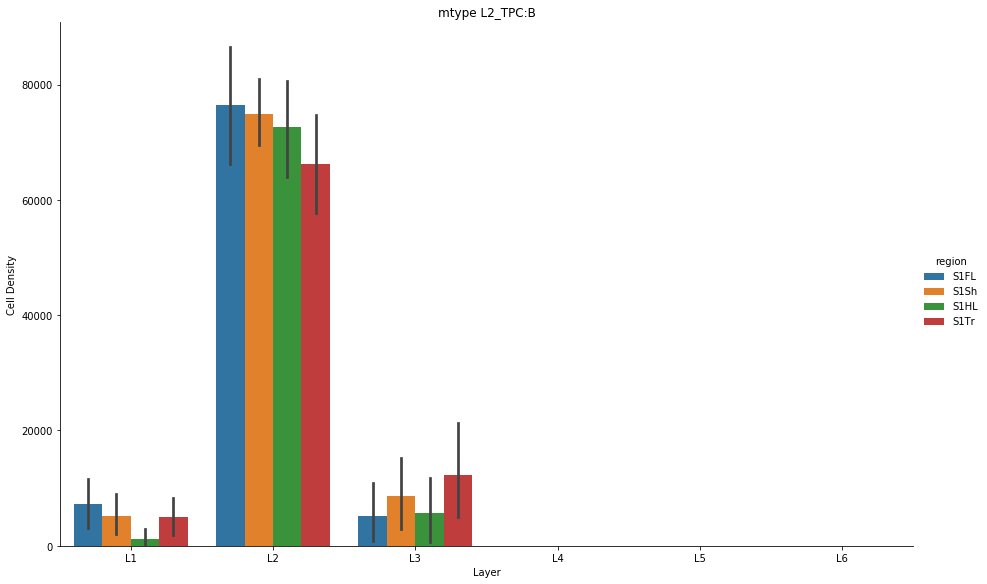

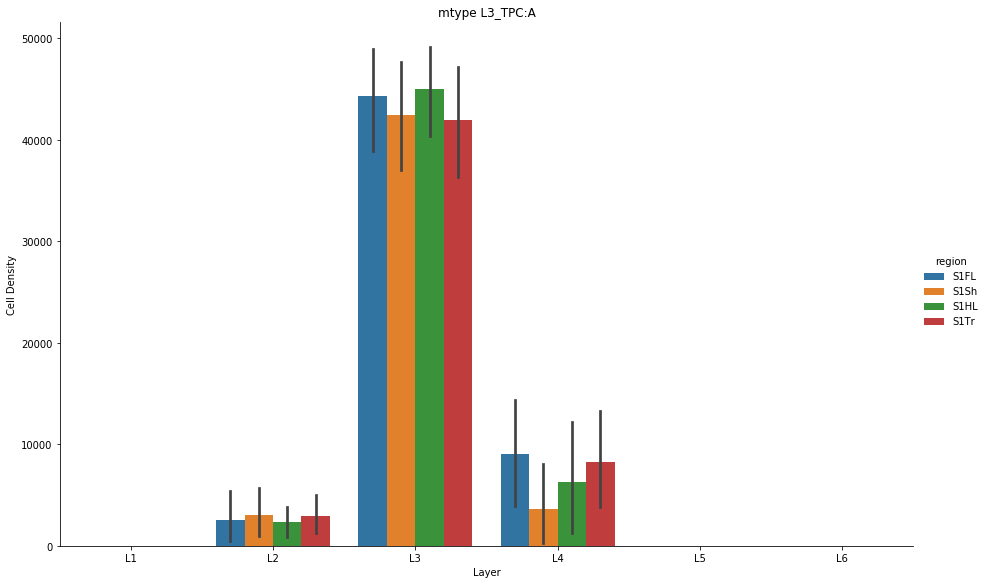

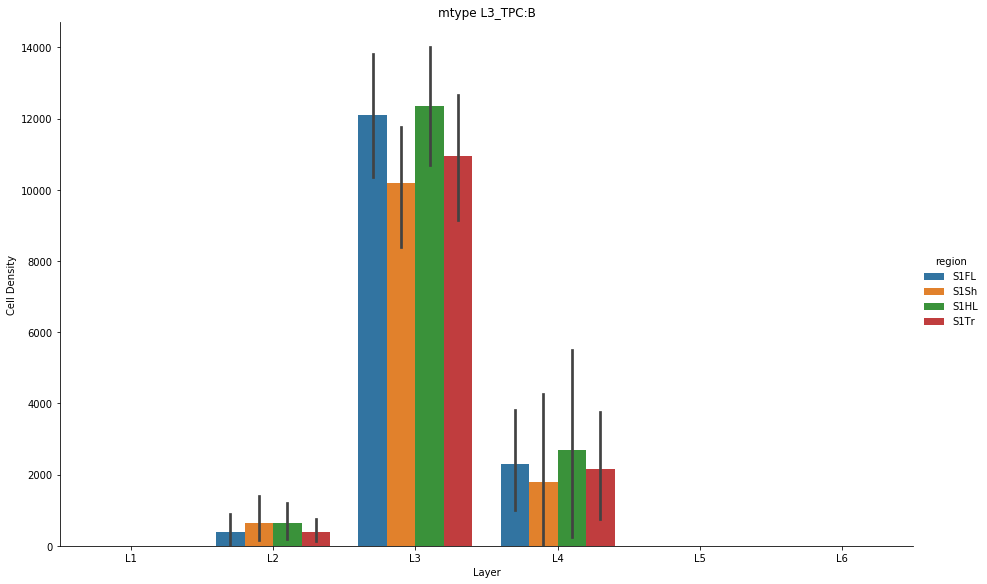

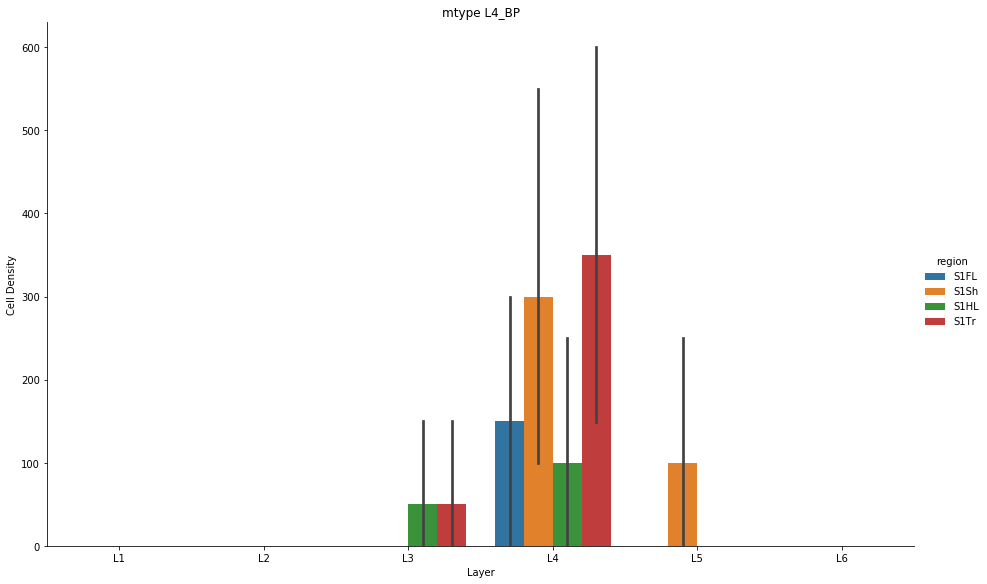

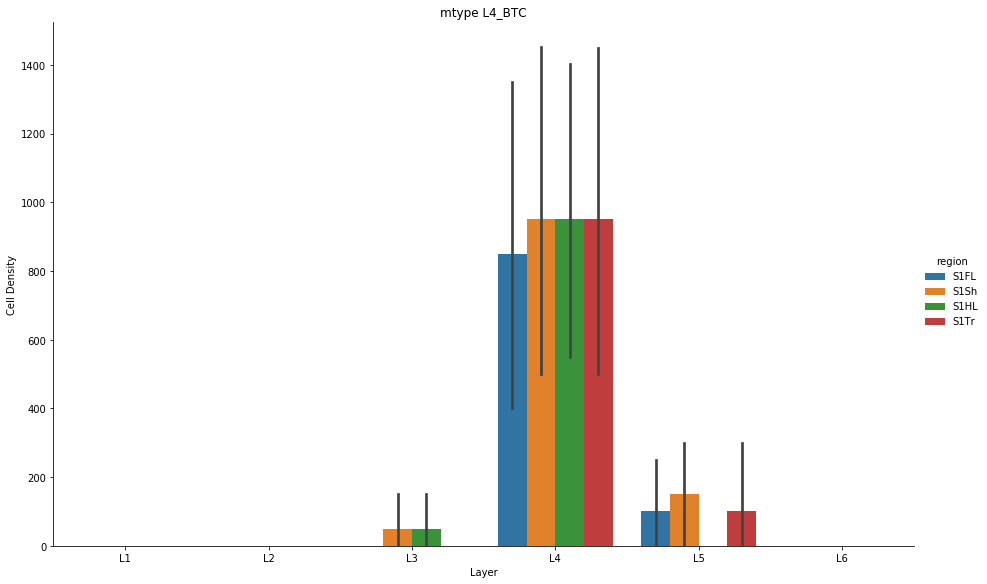

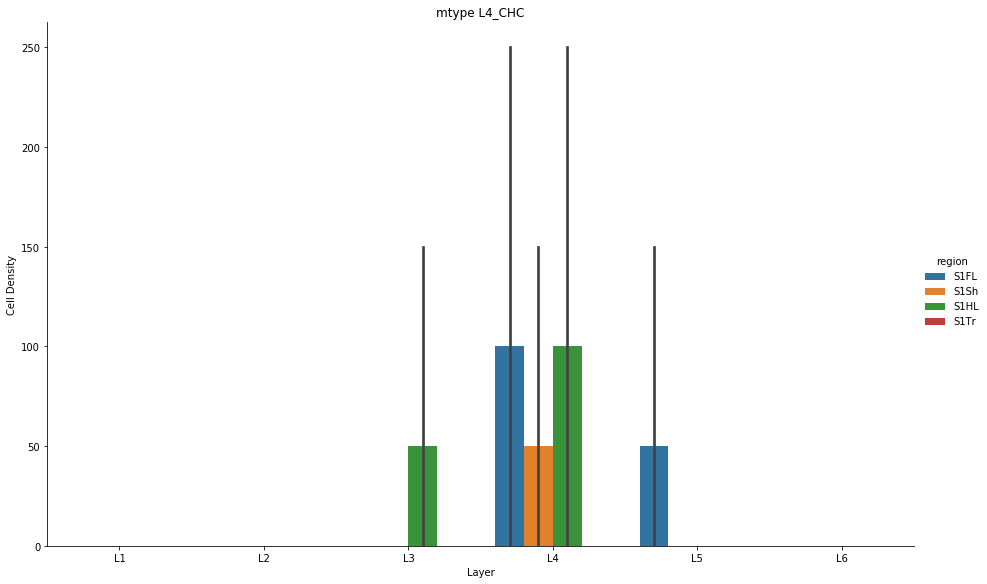

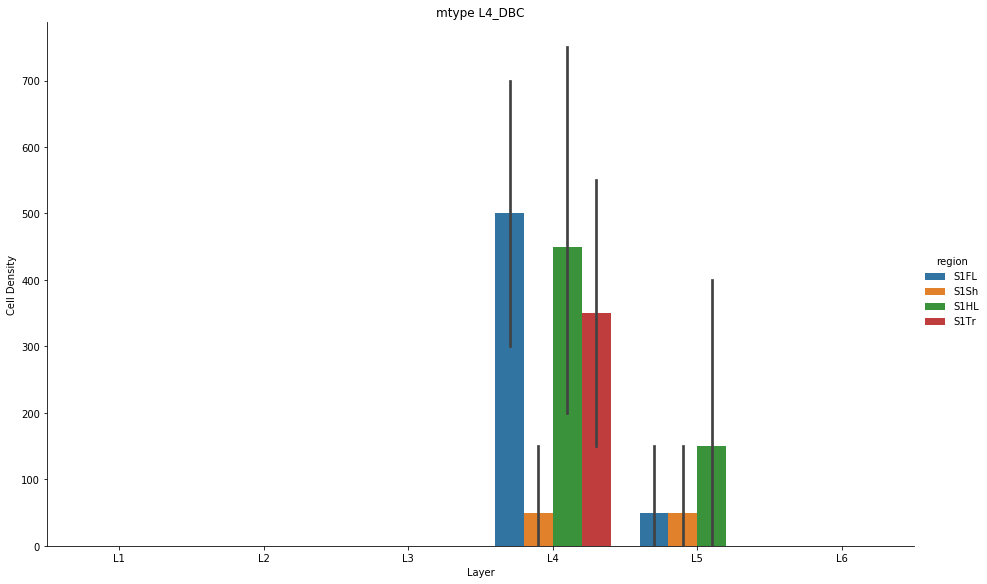

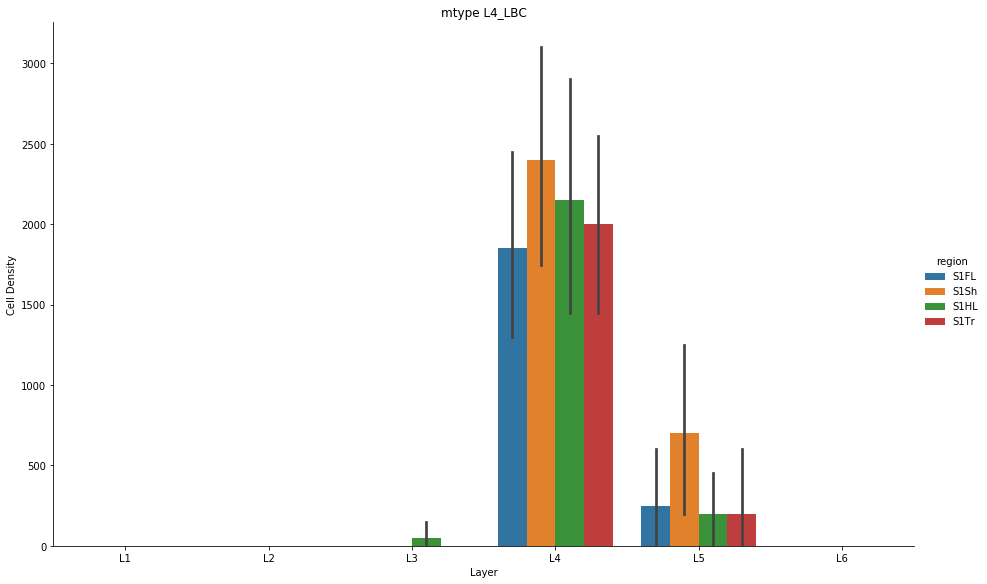

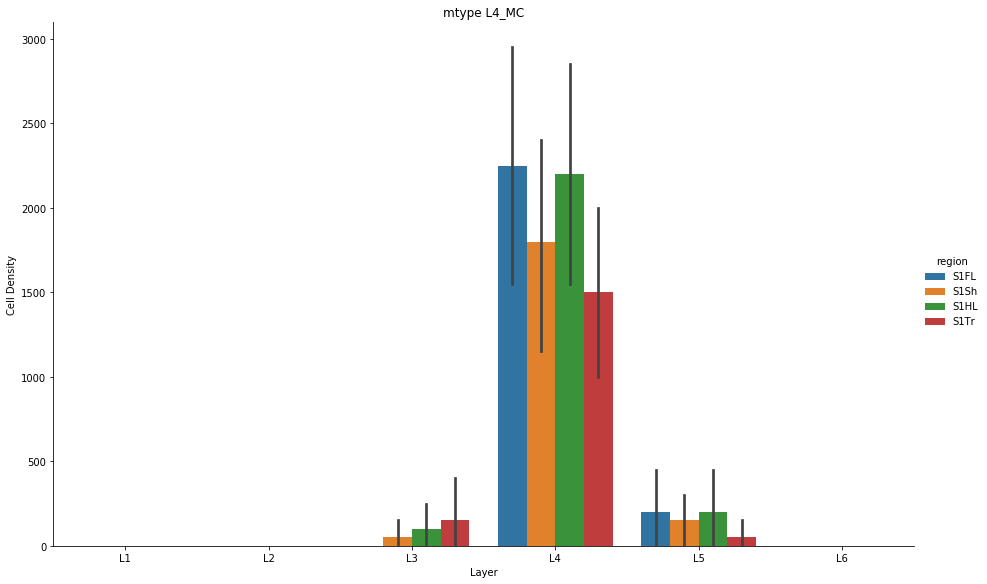

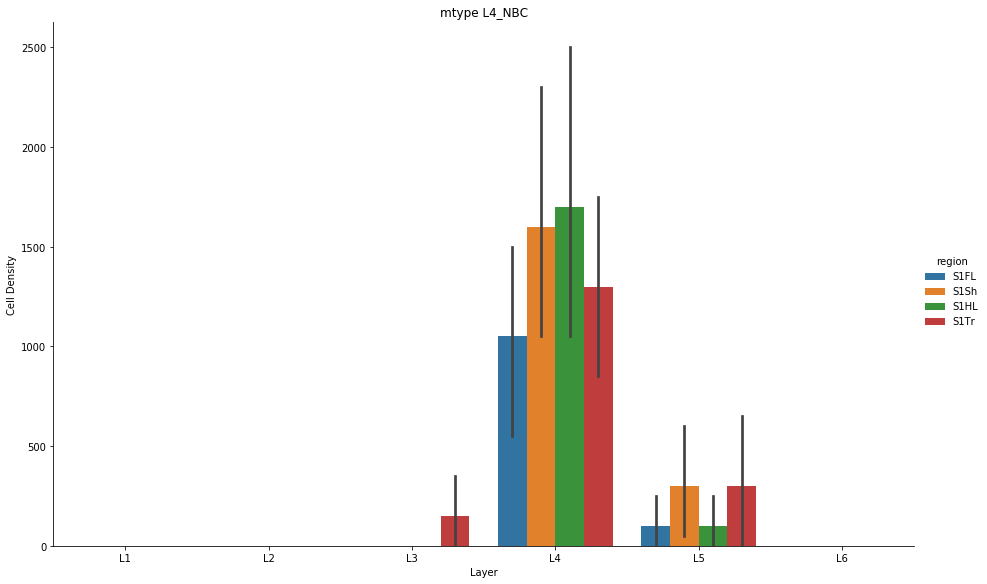

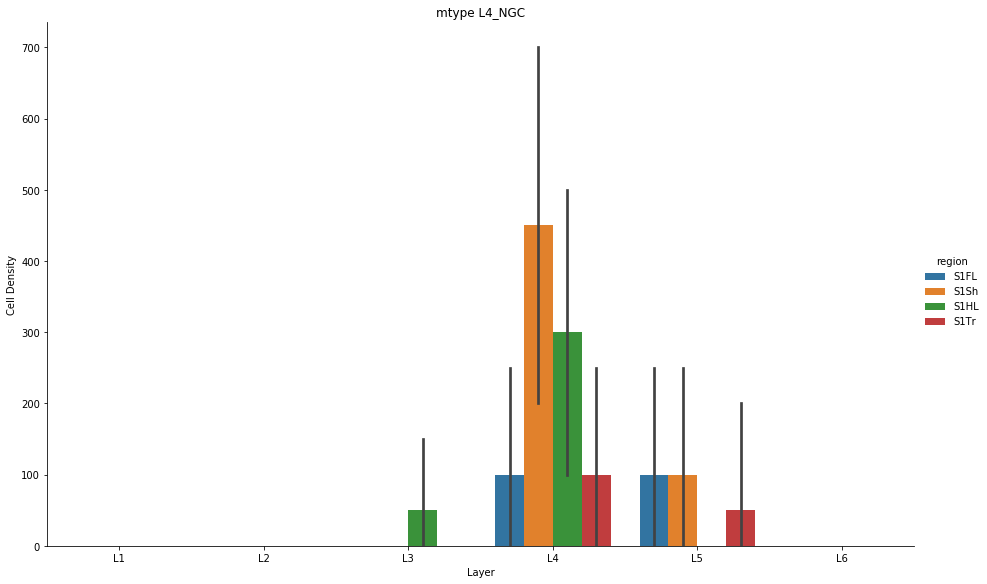

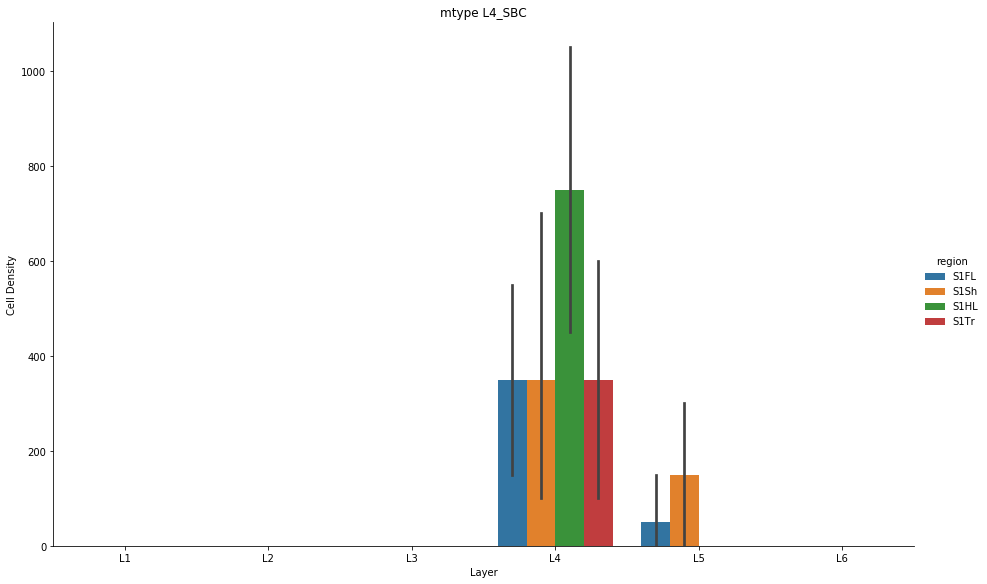

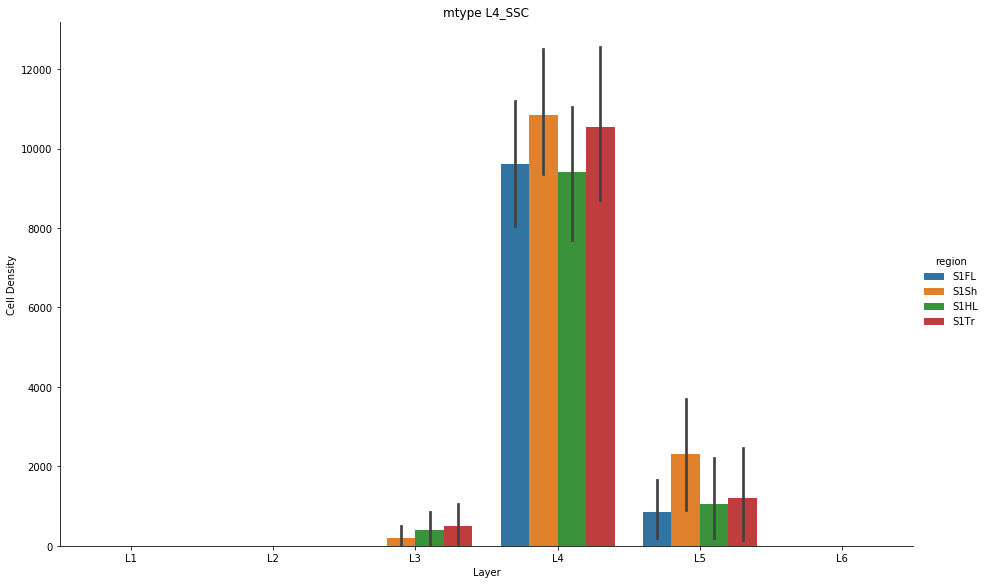

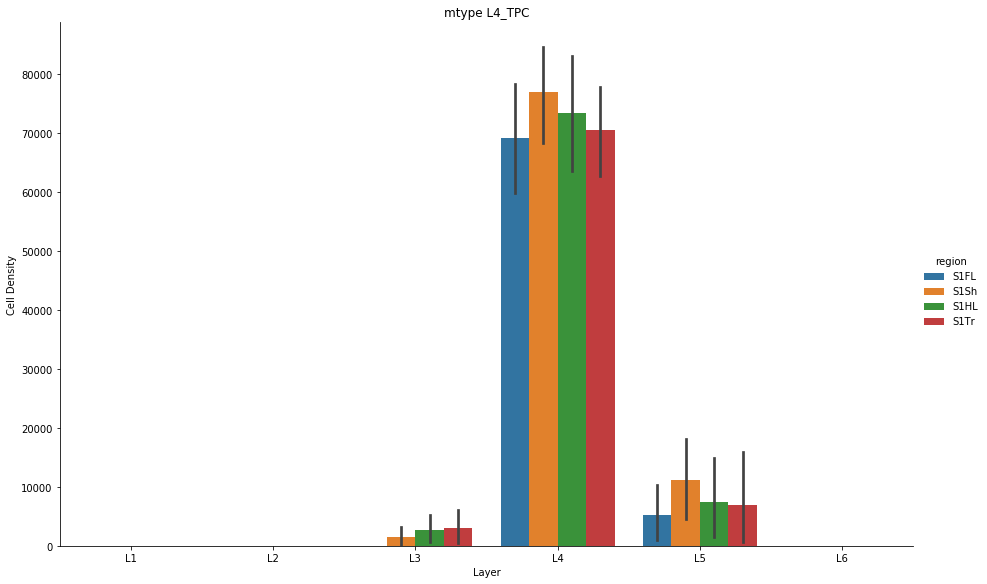

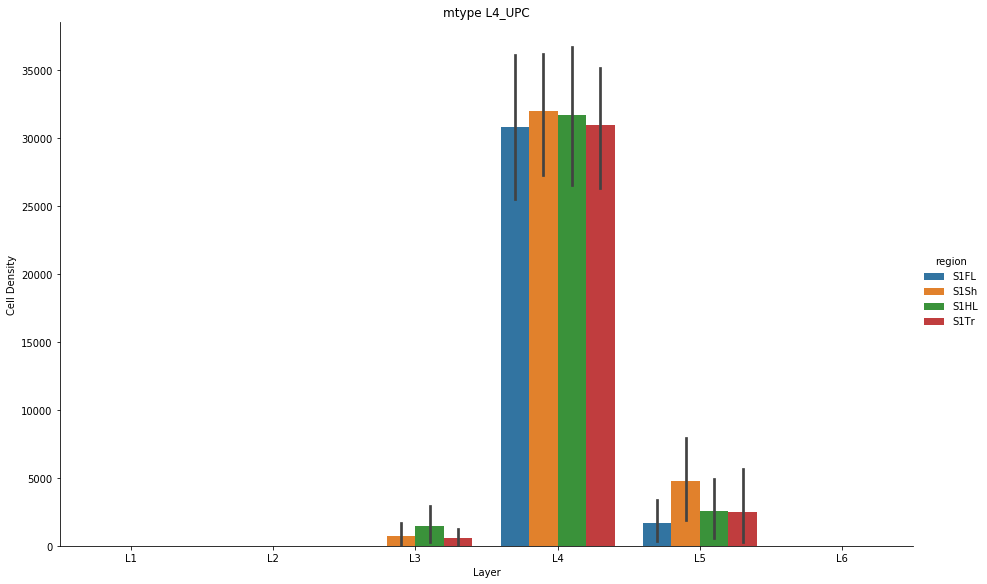

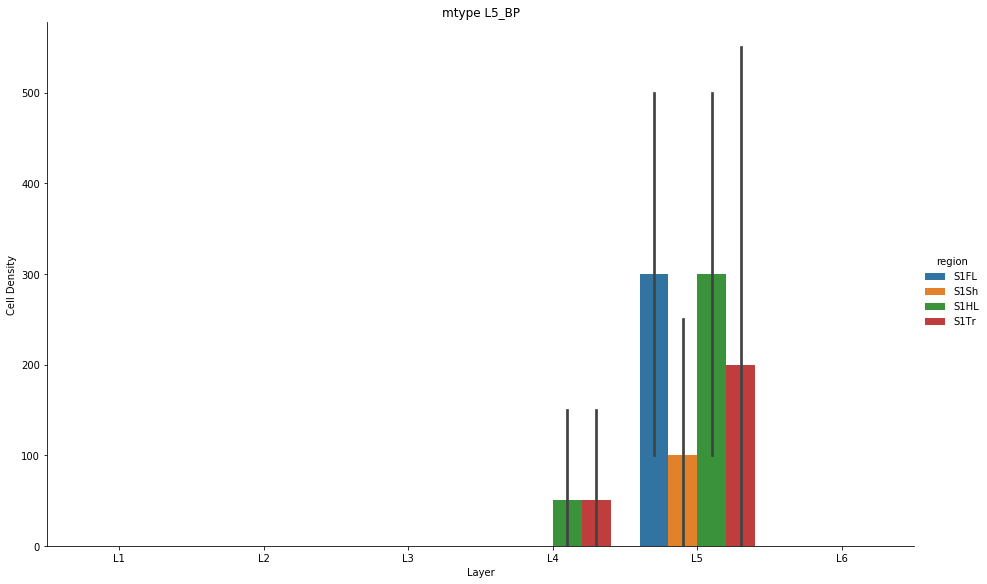

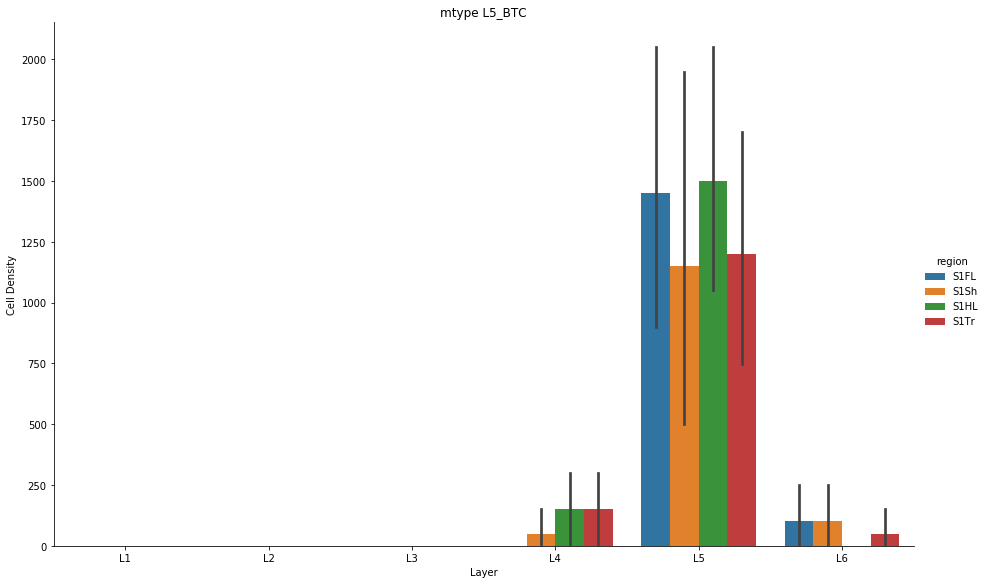

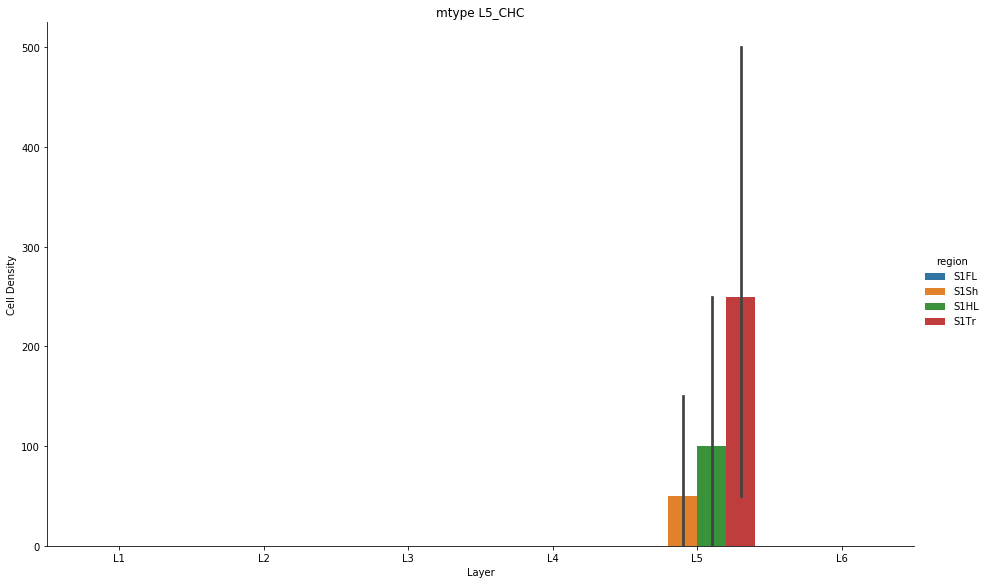

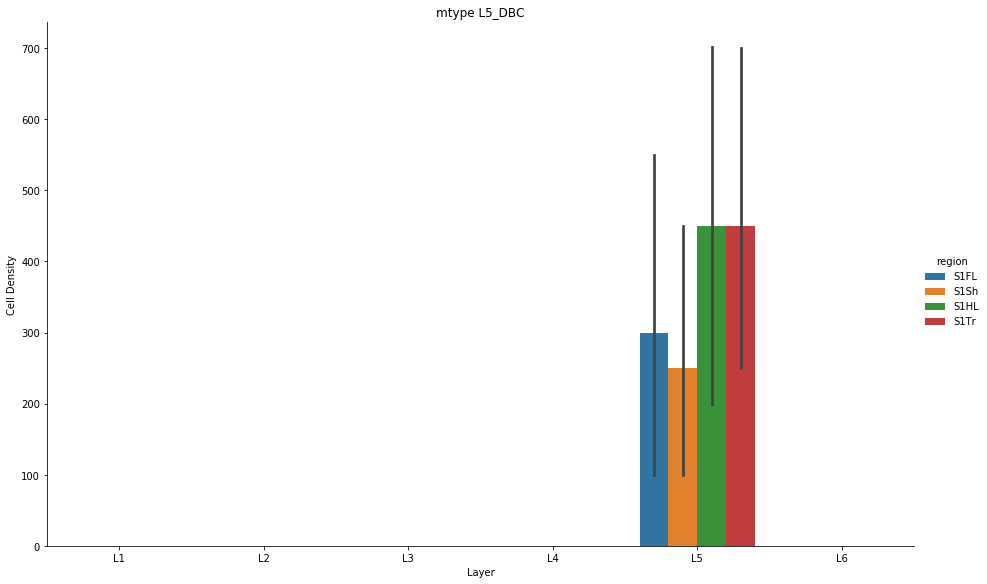

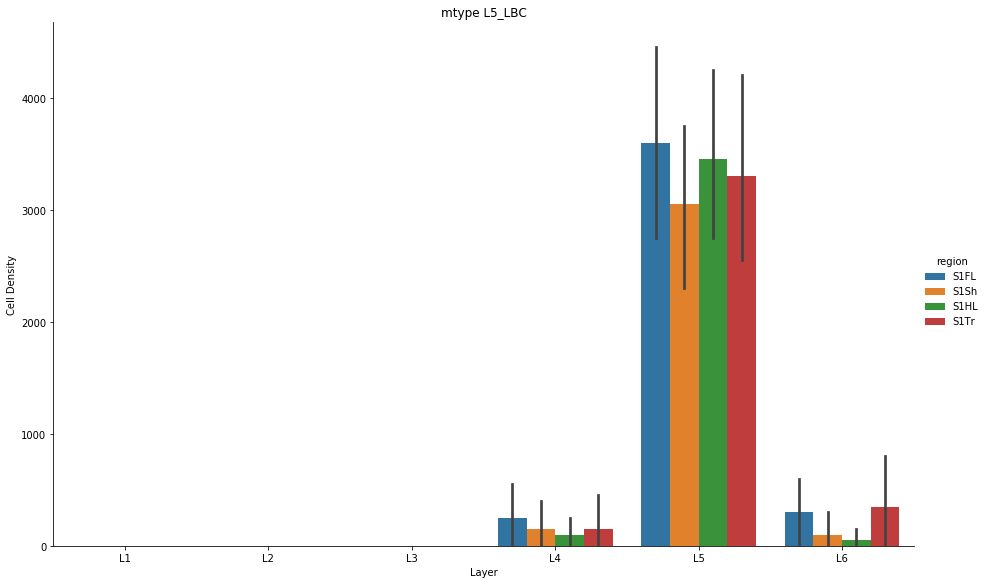

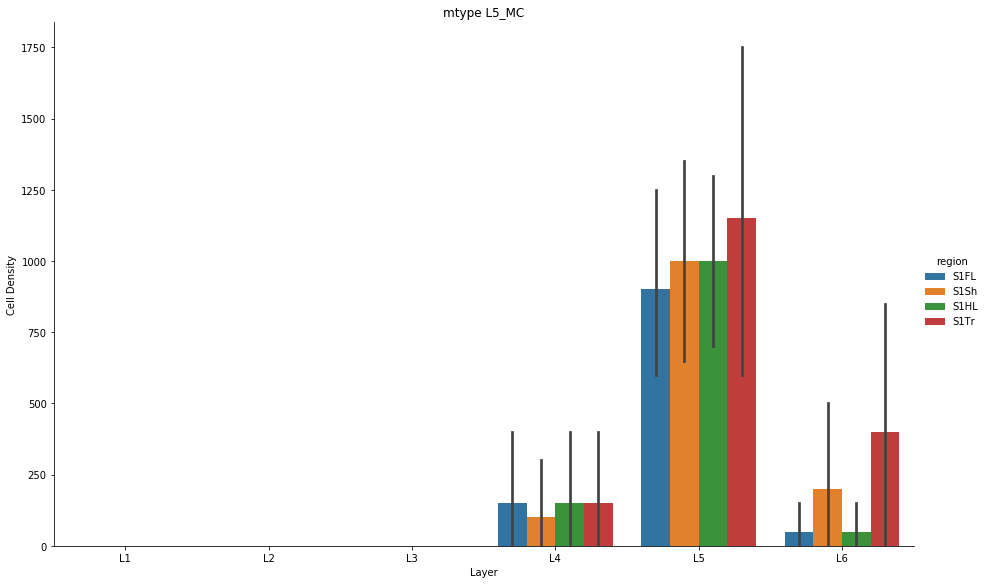

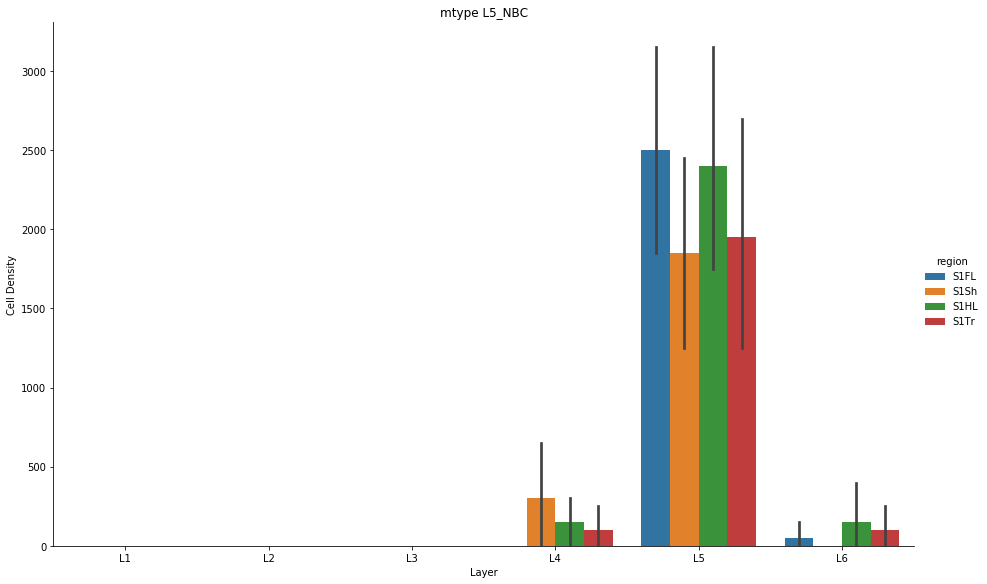

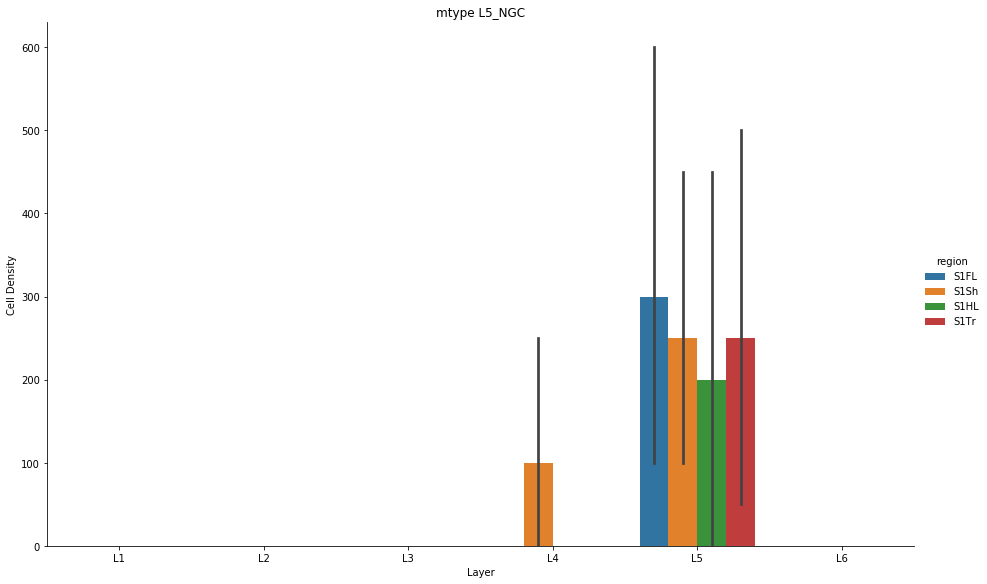

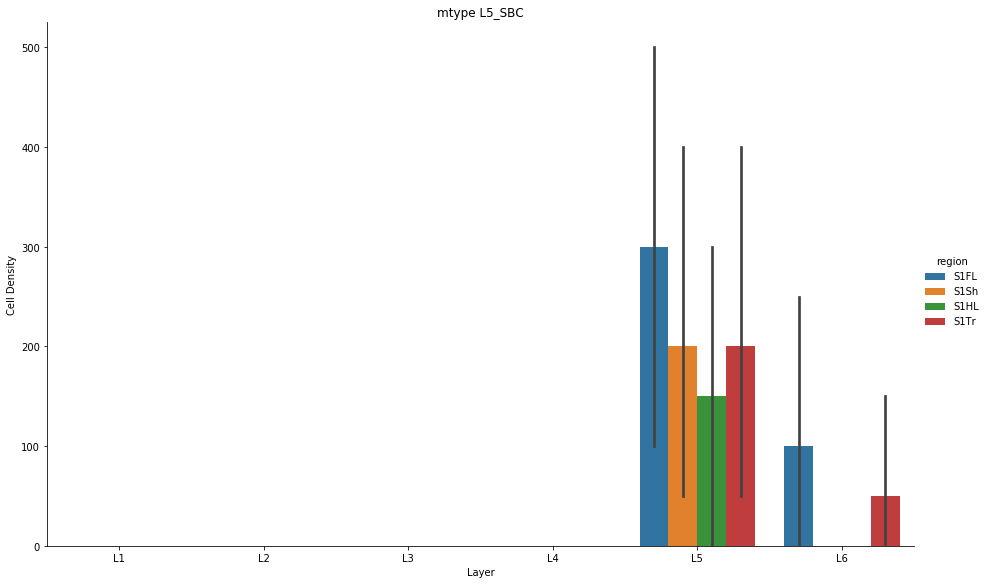

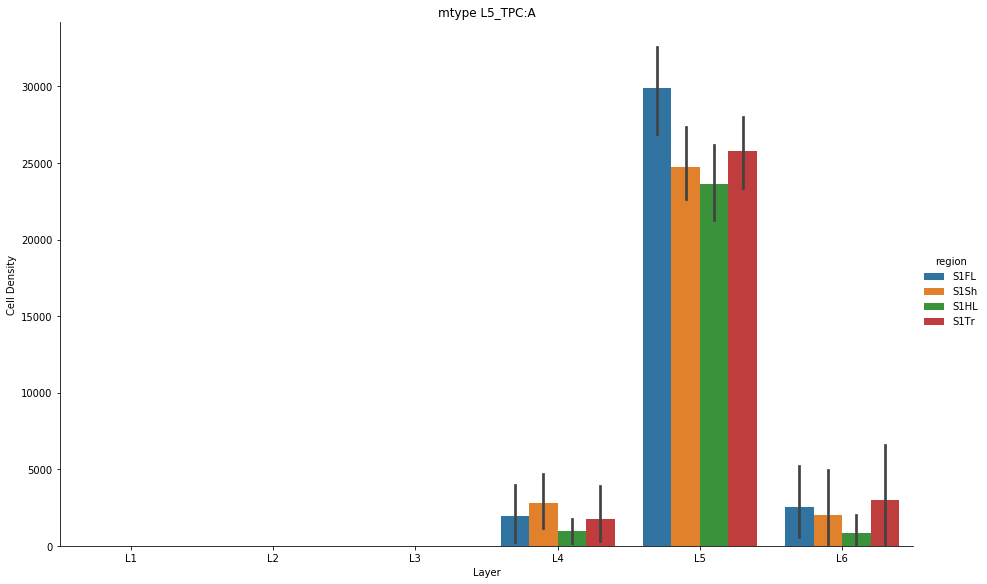

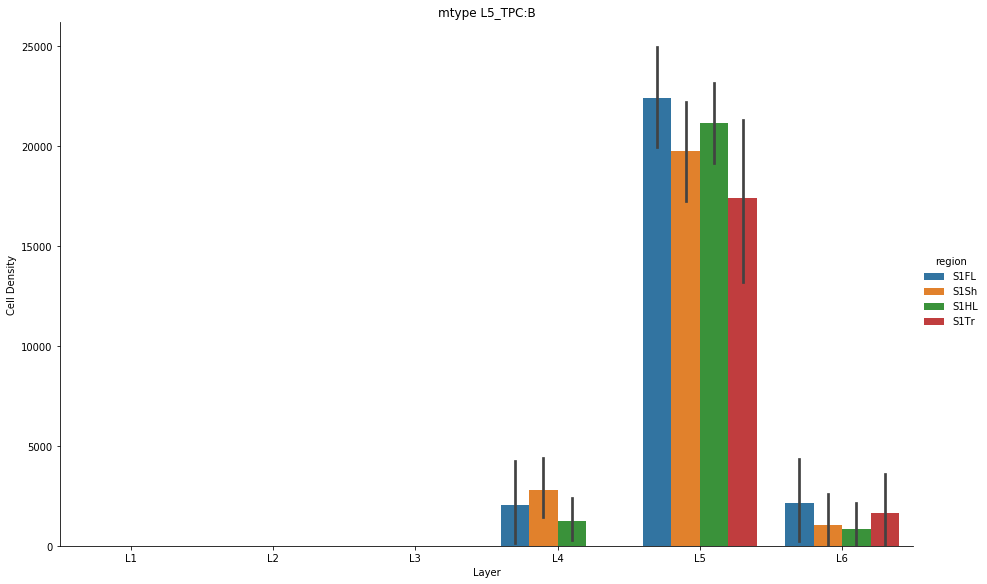

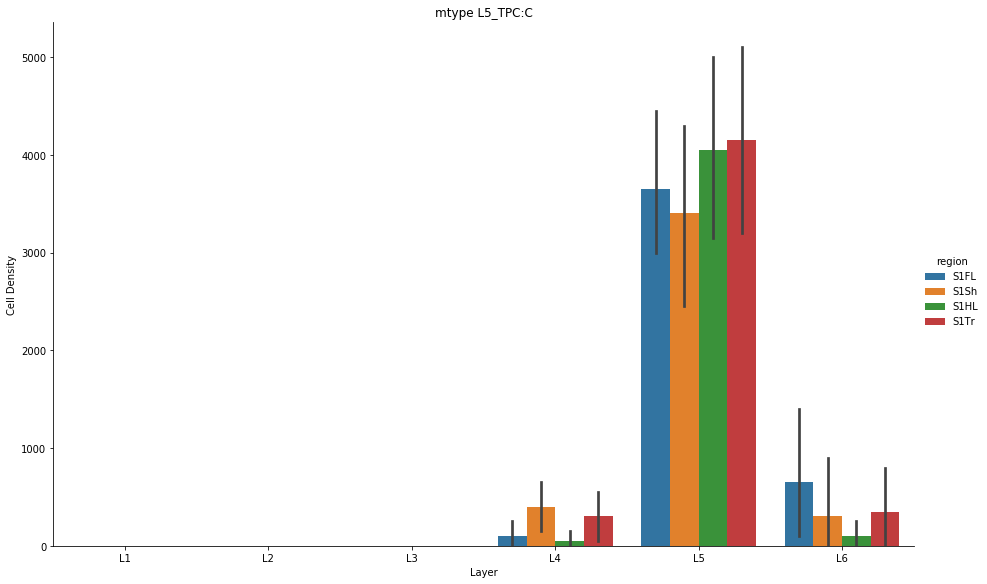

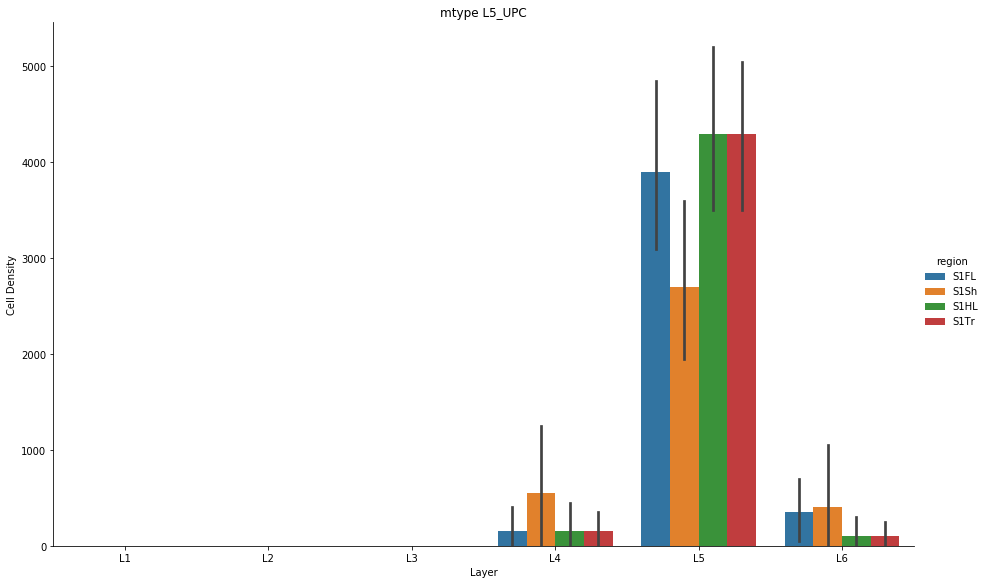

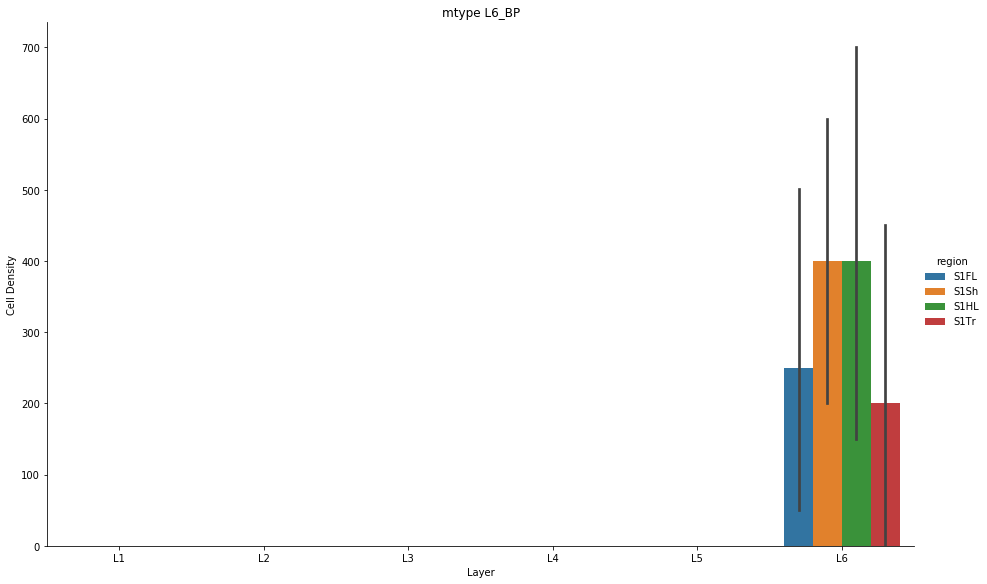

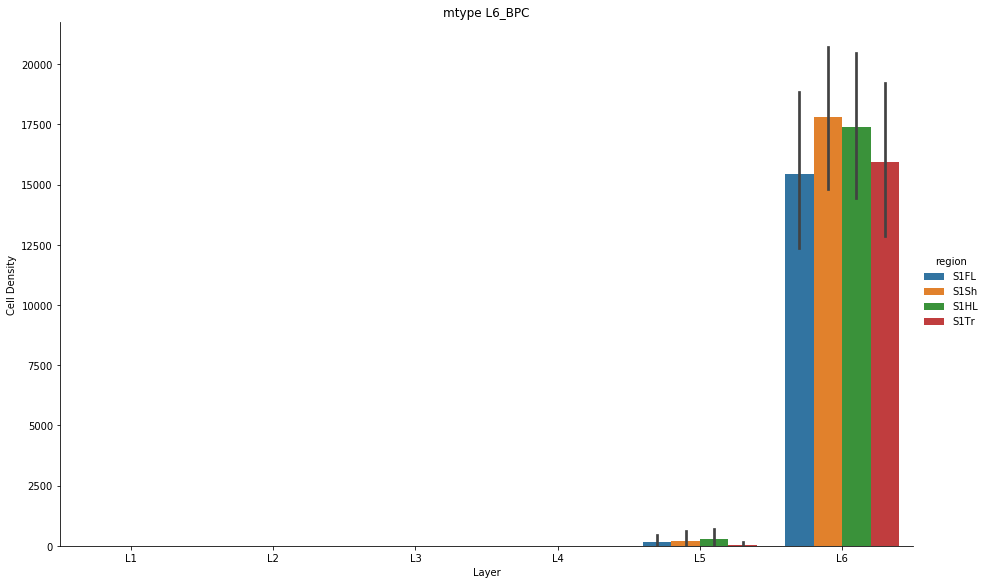

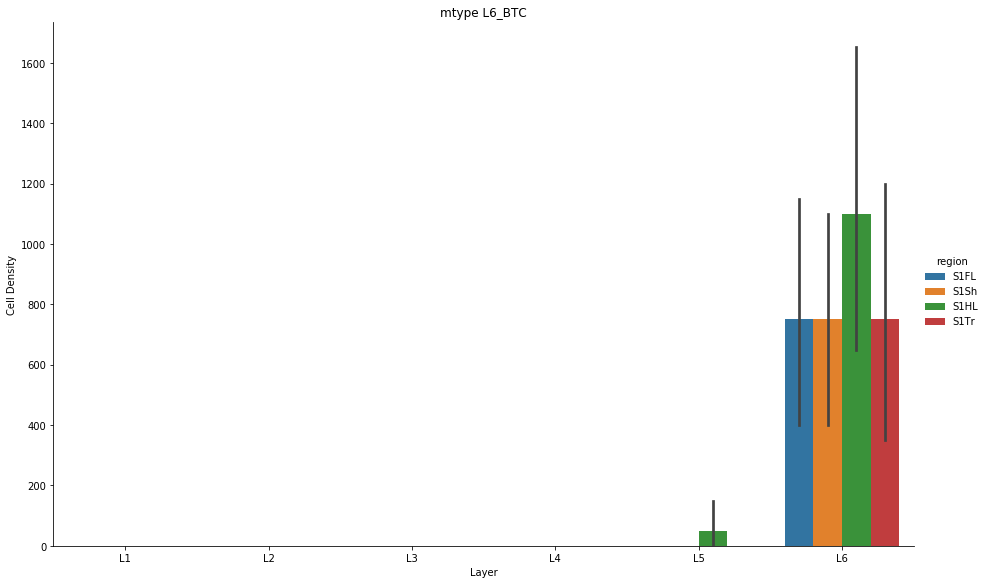

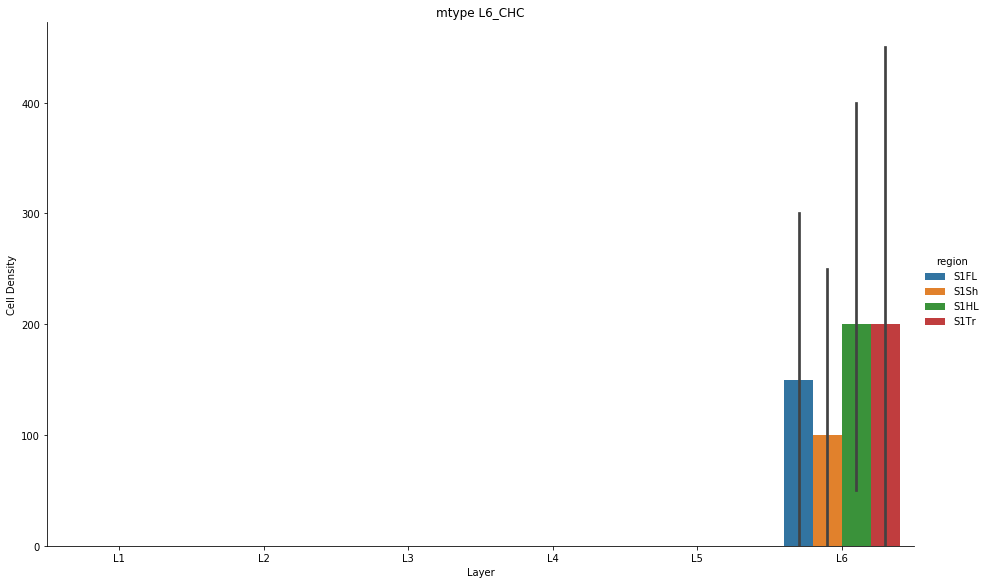

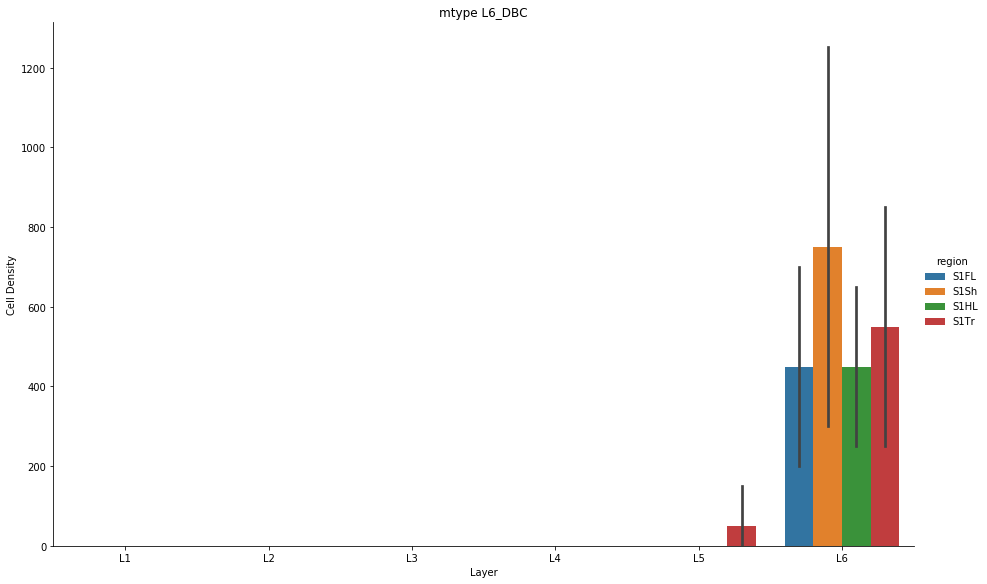

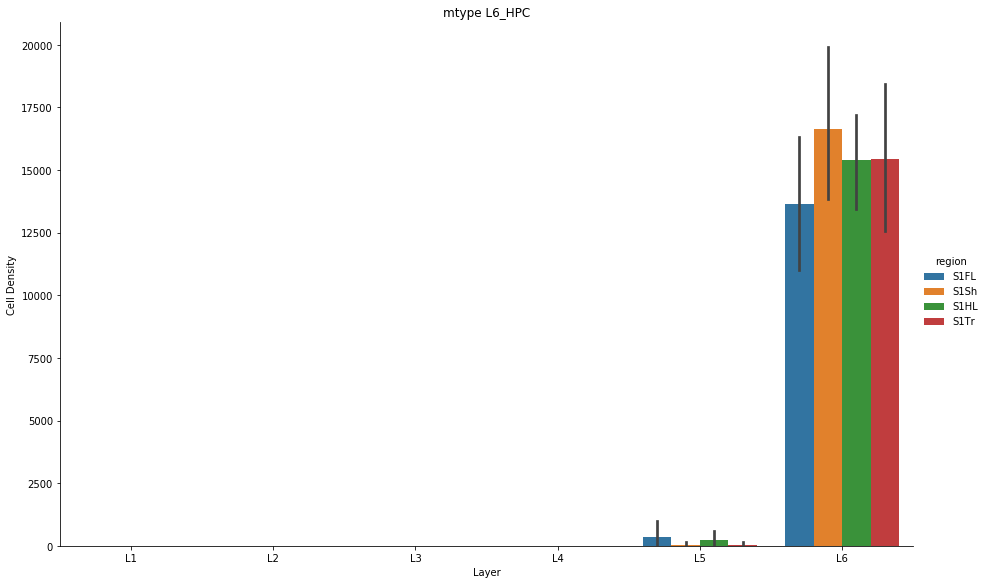

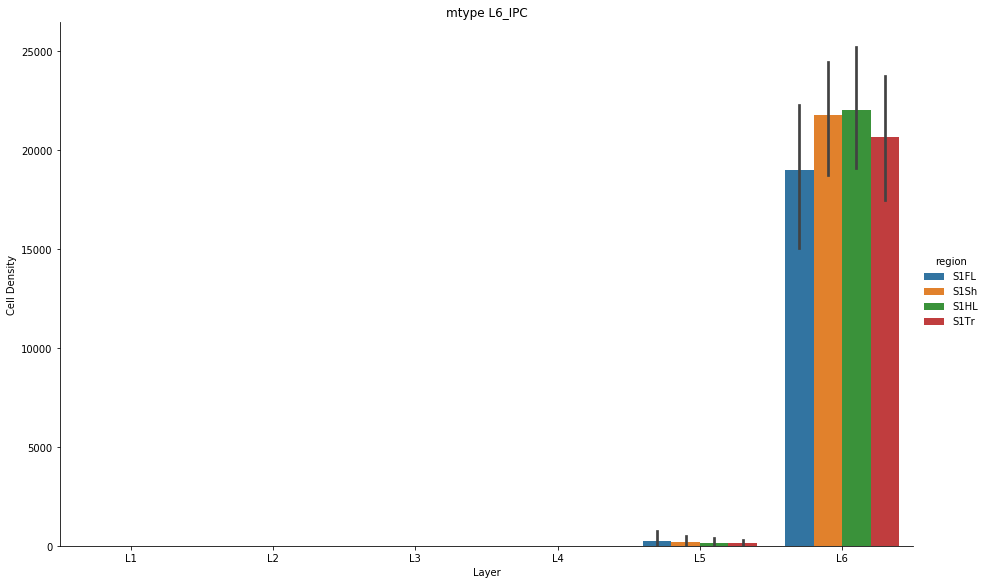

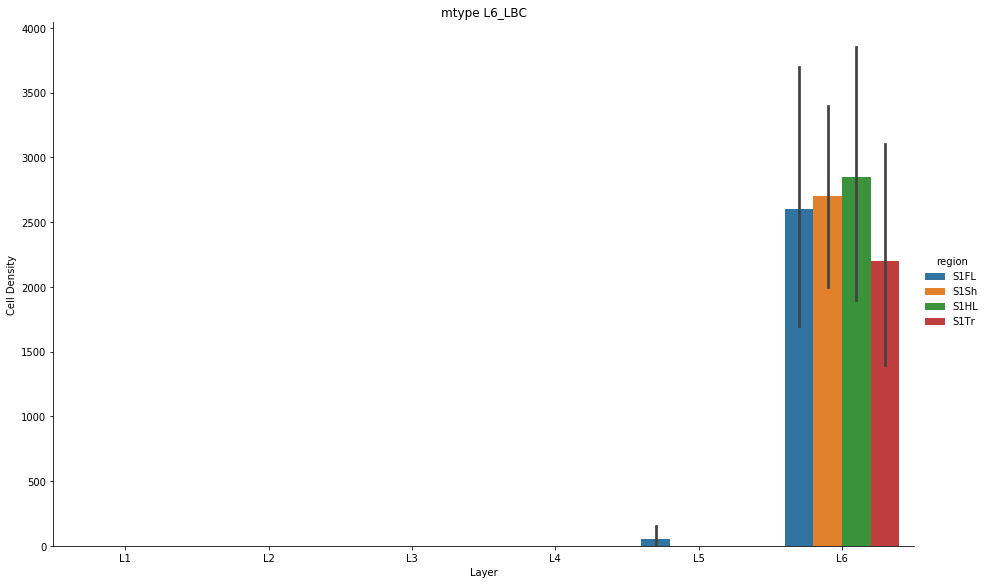

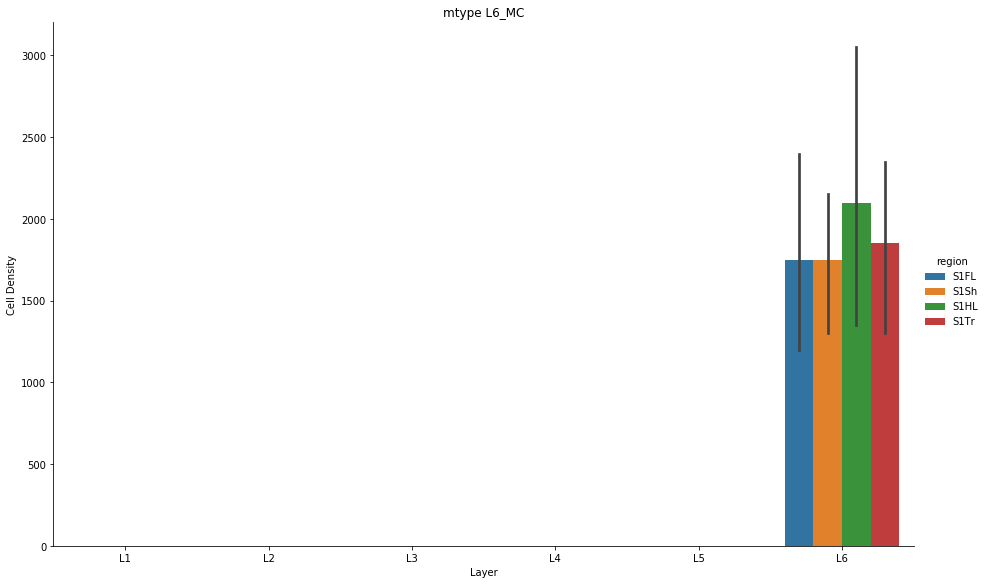

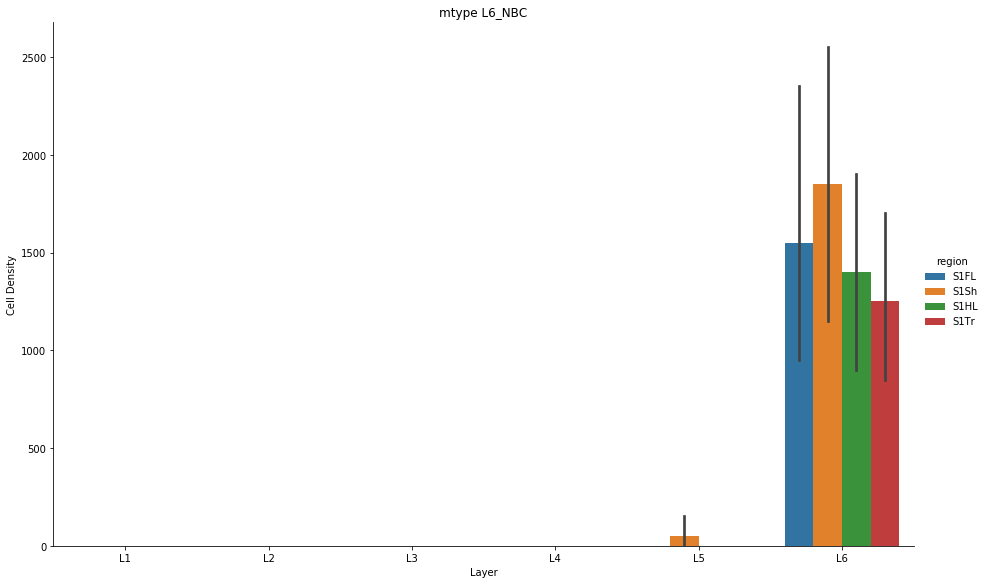

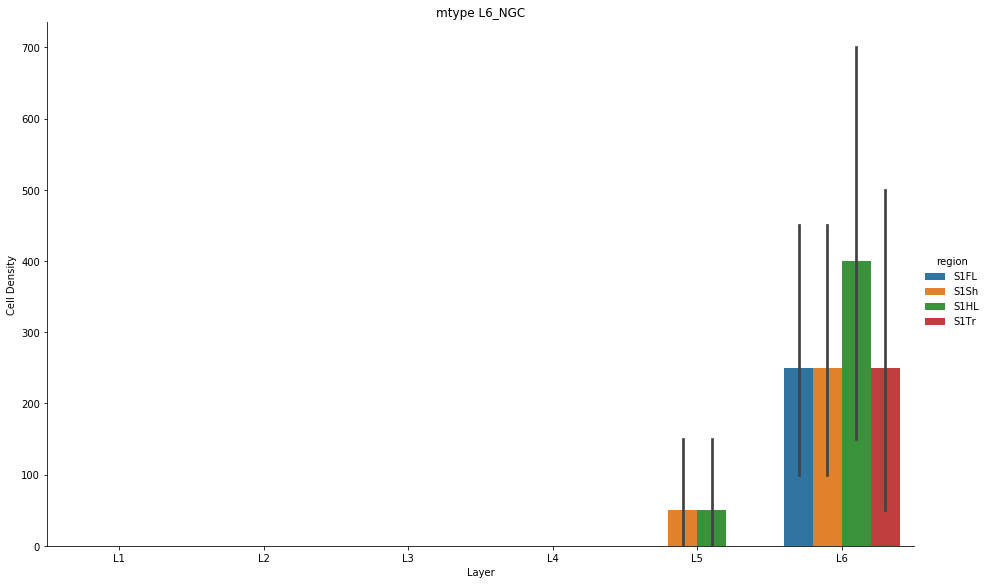

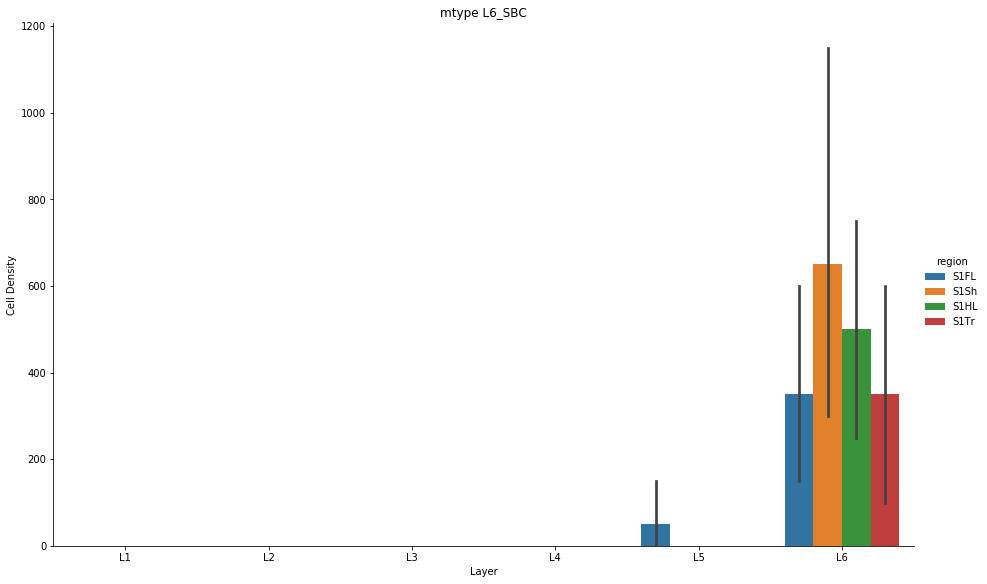

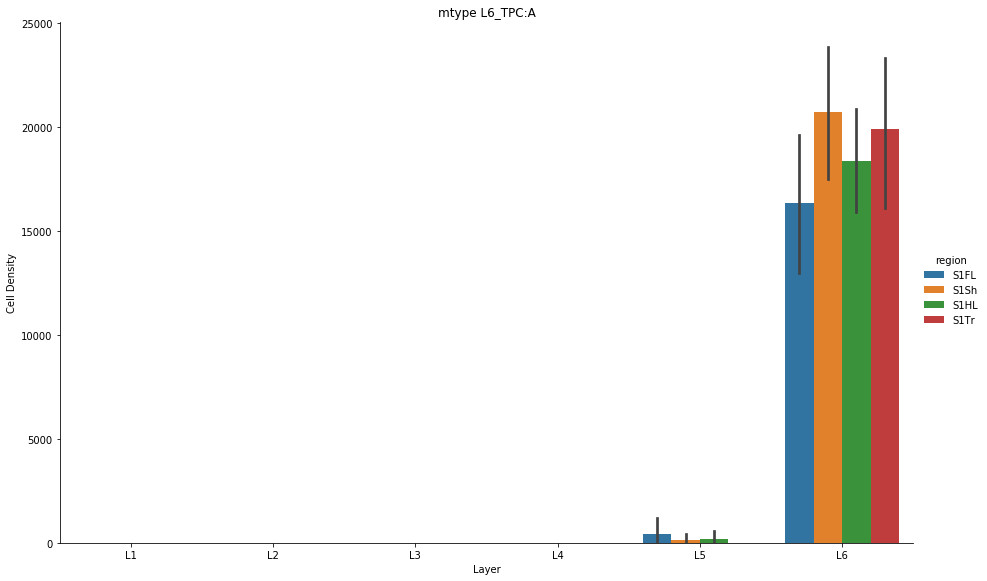

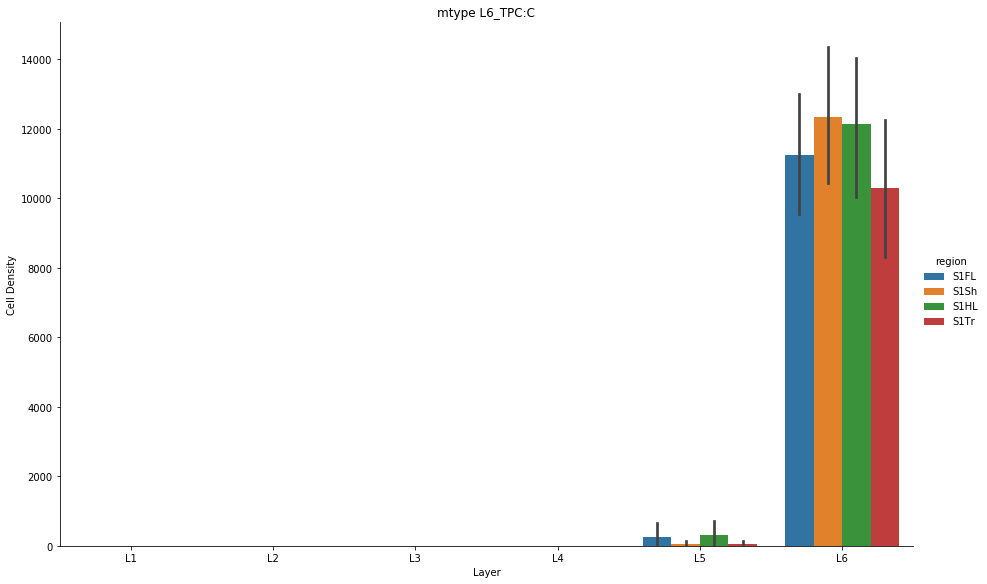

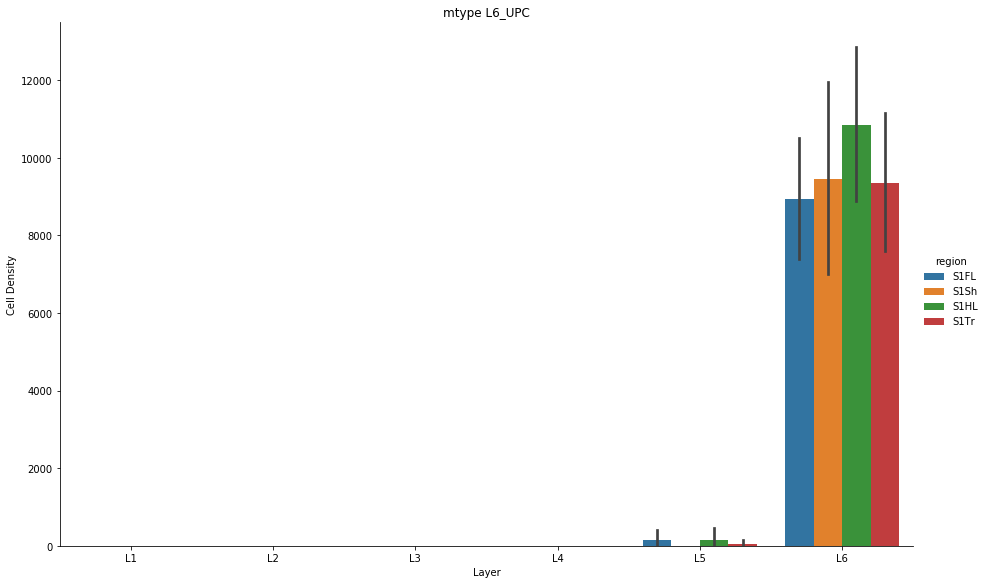

In [3]:
from neuro_dmt.data import rat
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition import\
    BrainCircuitCompositionAnalysis

adapter = BlueBrainCircuitAdapter()
composition_analysis =\
    BrainCircuitCompositionAnalysis(
        phenomenon = "circuit_composition",
        size_roi = 100. * np.ones(3))
composition_analysis(
    circuit_bio_m,
    adapter)

In [19]:
query_spatial =\
    {"layer": "L2", "region": "S1HL"}
count_cells =\
    adapter.get_cells(
        circuit_bio_m, **query_spatial).shape[0]
volume_region =\
    adapter.get_spatial_volume(
        circuit_bio_m, **query_spatial)
density_cells =\
    count_cells / volume_region
print(count_cells, volume_region, count_cells/volume_region)
print(1.1 * count_cells / volume_region)
density_cell_expected =\
    140885.
print(( - count_cells / volume_region) * volume_region)
count_cells_expected =\
    140885. * volume_region
print("missing: ", 1. - density_cells / density_cell_expected)
print("missing number of cells: ", count_cells_expected - count_cells)

59078 0.4459906074140625 132464.67306238884
145711.14036862773
-59078.0
missing:  0.059767377205601435
missing number of cells:  3755.3867255301957


In [ ]:
mtype_cell_density =\
    composition_analysis.get_mtype_cell_density_by_layer_measurement(
        circuit_bio_m,
        adapter)

In [ ]:
from dmt.tk.plotting import Bars
from dmt.tk.plotting.multi import MultiPlot
plotter =\
    MultiPlot(
        mvar="mtype",
        plotter=Bars(
            xvar="layer",
            xlabel="Layer",
            yvar="cell_density",
            ylabel="Cell Density",
            gvar="region"))
figure =\
    plotter.get_figures(
        {adapter.get_label(circuit_bio_m): mtype_cell_density},
        caption="Jinga jinga. Boom Boom.")

In [ ]:
composition_analysis.sample_size

In [ ]:
layer_cell_density =\
    composition_analysis.get_cell_density_measurement(
        circuit_bio_m, 
        adapter)

In [ ]:
layer_cell_density.groupby(
    ["dataset", "region", "layer"]
).agg(
    ["size", "mean", "std"]
)

In [ ]:
composition_analysis(circuit_bio_m, adapter)

In [ ]:
from neuro_dmt.data import rat
rat_df2017 =\
    rat.defelipe2017.data[
        ["layer", "cell_density"]
    ].groupby(
        "layer"
    ).agg(
        ["mean", "std"]
    ).reset_index(
    ).assign(
        layer = range(1,7)
    ).set_index(
        "layer"
    )
rat_df2017

In [11]:
import sys
import os
path_sscxdis_tools =\
    os.path.join(
        os.getenv("HOME"),
        "work/bbp/work",
        "projects/proj64/dissemination/tools")
path_rats =\
    os.path.join(
        path_sscxdis_tools,
        "sscxdis", "resources", "data", "rats")
print(os.listdir(path_rats))
sys.path.append(path_sscxdis_tools)
import sscxdis

['characterize_drop_rate_thickness_tiny.yaml', 'DeFelipe2014.yaml', 'defelipe_shrinkage_corrected_12_13_14.csv', 'defelipe_2017_shrinkage_corrected_variations.csv', 'defelipe_shrinkage_corrected_rats.csv', 'custom.yaml', 'characterize_drop_rate_thickness.yaml', 'defelipe_shrinkage_corrected_mean.csv', 'release_2017_variations.csv', 'defelipe_shrinkage_corrected_15_16_17.csv', 'characterize_drop_rate_cell_density.yaml', 'DeFelipe2017.yaml']


In [12]:
shrinkage_corrected_rat_data =\
    pd.read_csv(
        os.path.join(
            path_rats,
            "defelipe_shrinkage_corrected_rats.csv")
    ).groupby(
        "layer"
    ).agg(
        lambda group: pd.Series(dict(
            thickness=group.thickness.mean(),
            density=group.density.mean()))
    ).drop(
        columns="subject"
    )

In [13]:
shrinkage_corrected_rat_data

,thickness,density
layer,,
1,144.700000,11810.270833
2,130.566667,140885.231667
3,309.633333,69576.703333
4,166.300000,147332.513333
5,460.666667,69693.500833
6,614.416667,109165.387500


In [ ]:
shrinkage_corrected_rat_data.density / rat_df2017[("cell_density", "mean")]


In [ ]:
rat_df2017

In [ ]:
rat.defelipe2017.summary_measurement.data

In [4]:
np.sqrt(125000.)

353.5533905932738